Connected to env1 (Python 3.8.5)

In [1]:
import sys
import os
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
from database.databaseFunctions import *
from numerical.cn_plot import *
from analytical.phase_diagram import *
from equations.twonode_eq import *


import pickle
#############
#############
###paths#####
#############

import sys
import os
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import seaborn as sns
my_cmap = ListedColormap(sns.color_palette('turbo', 256))   


In [2]:
#solver parameters
L=25; dx =0.05; J = int(L/dx)
T =2000; dt = 0.005; N = int(T/dt)
x_grid = np.array([j*dx for j in range(J)])

boundaryCoeff=1;rate=L/T
suggesteddt = float(dx*dx*2)
mechanism = 'nogrowth'
simulation_param_dict = {'L':L, 'dx':dx, 'J':J, 'T':T, 'dt':dt, 'N':N, 
            'boundaryCoeff':boundaryCoeff, 
            'mechanism':mechanism, 'growth_rate': rate}
model_param_dict = lambda parID: {'parID':parID, 'circuit_n':circuit_n,'variant':variant, 'n_samples':n_samples}



circuit_n='turinghill'
variant= '11'
n_samples=1000000

model_param_df = query_modelParam_df_from_sql({'circuit_n': circuit_n, 'variant': variant, 'n_samples': n_samples})
model_param_df

/Users/mo2016/Documents/modelling/lib/database/databaseFunctions.py:231: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


ba          bb          Va          Vb        kaa        kba  \
parID                                                                           
0         33.255157  330.081651   29.702468   83.525524   1.010845   1.669121   
1        346.522809  240.465418  618.349241   81.573823   0.471223   7.877695   
2        209.031099   11.007835  209.644761  363.137664   0.105647   2.097033   
3         29.974923   16.563770   85.020793  146.451856   0.114685   1.573725   
4         28.940217  279.999535  651.500713   21.917179   8.092267  14.566793   
...             ...         ...         ...         ...        ...        ...   
8935892   12.247020   17.005406  573.223081  150.953011  10.304020   1.413626   
8293223   11.093201   45.938546  447.782421  650.687835   1.825461  68.428594   
8373578   12.180200   22.089903  557.737801  196.936973   5.232883  47.005304   
8486521   15.628496   11.777223  958.010678  483.165279   6.998944  18.778414   
8822687   15.981591   12.551332  227.766088   72.941467   1.281530  38.549149   

               kab        kbb        mua        mub         n   d_A   d_B  
parID                                                                      
0         9.406142  20.698511  29.827986  43.497765  2.115029  0.01  10.0  
1        73.143242   0.944446  31.672590  59.090396  3.143402  0.01  10.0  
2         2.700806   4.013588  61.956995   1.329298  2.326985  0.01  10.0  
3         0.137940   0.225937  54.100422  15.347973  2.410886  0.01  10.0  
4         2.786004   1.884291   8.342856   4.286182  2.880947  0.01  10.0  
...            ...        ...        ...        ...       ...   ...   ...  
8935892   6.558200  18.772681  15.869931  73.116873  2.518179  0.01  10.0  
8293223   0.627511  35.842991  46.579308   4.277808  2.182670  0.01  10.0  
8373578   2.833866   0.403052  36.524391   4.414850  3.412499  0.01  10.0  
8486521   7.213854   1.031624  31.049527   6.585890  2.494847  0.01  10.0  
8822687   0.676930   1.048856  79.302984   2.519041  2.558795  0.01  10.0  

[5077 rows x 13 columns]

In [5]:
query_system_class = lambda parID,ssID:f'''select ao.system_class, ao.ss_list from analytical_output ao
inner join model_param mp on ao.model_param_id = mp.model_param_id
where variant='11'
and circuit_n='turinghill'
and n_samples=1000000
and mp."parID"={parID}
and ao."ssID"={ssID}'''


In [3]:
#find turing parID with multistability
query = '''select mp."parID", ao."ssID", ao.ss_n, ao.ss_list  from analytical_output ao
inner join model_param mp on ao.model_param_id = mp.model_param_id
--
where ao.system_class in ('turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf', 'turing semi-hopf')
and mp.variant='11'
and mp.n_samples=1000000
and ao.ss_n>1;'''
df = df_from_general_query(query)
df = df.set_index('parID')
df = df[~df.index.duplicated()]
df

/Users/mo2016/Documents/modelling/lib/database/databaseFunctions.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,con=conn)


ssID  ss_n            ss_list
parID                                 
1003464     1   3.0   [2.8037, 5.7428]
1196380     2   3.0   [30.0466, 2.649]
1226391     2   3.0    [5.2219, 0.906]
1334486     2   3.0   [8.5069, 1.7738]
1365286     1   3.0  [12.3008, 6.6216]
...       ...   ...                ...
727722      2   3.0   [2.5628, 3.7081]
731715      2   3.0   [12.082, 6.2022]
865855      2   3.0  [1.4477, 27.9123]
1200931     2   3.0  [7.9995, 12.7525]
1333193     1   3.0    [4.242, 9.8423]

[97 rows x 3 columns]

  0%|          | 0/24 [00:00<?, ?it/s]

parID SSID: 7795267 0
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:7795267_circuit:turinghill_variant:11_samples:1000000


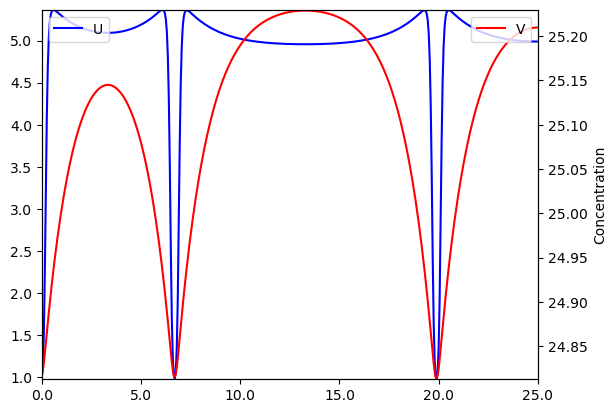

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:7795267_circuit:turinghill_variant:11_samples:1000000


  0%|          | 0/24 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [6]:
from tqdm import tqdm 
for parID in tqdm(df.index[38+35:]):
# for parID in [2579657, 3895372, 3764768, 3983742, 1963709, 2579567, 3314571, 4183530]
    ss_n = df.loc[parID]['ss_n']
    for ssID in range(int(ss_n)): 
        
           
        print('parID SSID:', parID, ssID)
        print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
        U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
        plot1D(U_final, savefig=False,filename='')

        U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
        surfpattern(U_record,L,dx,J,T,savefig=False,filename='')
        plt.show()


    # query_and_produce_phase_diagram(parID,int(ss_n))      
    print('')
    print('')  
    print('')
    print('-------')
    print('')
    print('')
    print('')
# %%


parID SSID: 3895372 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


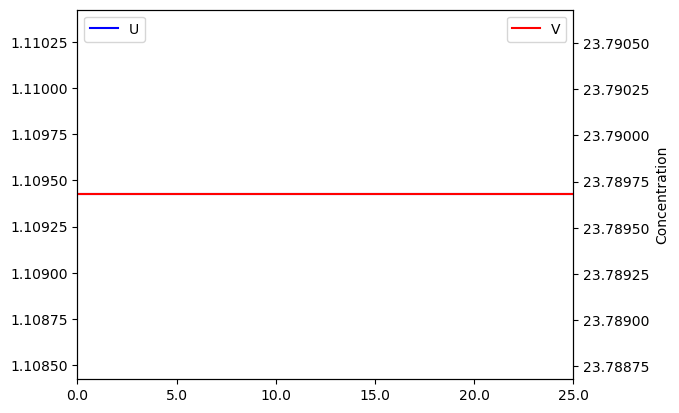

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


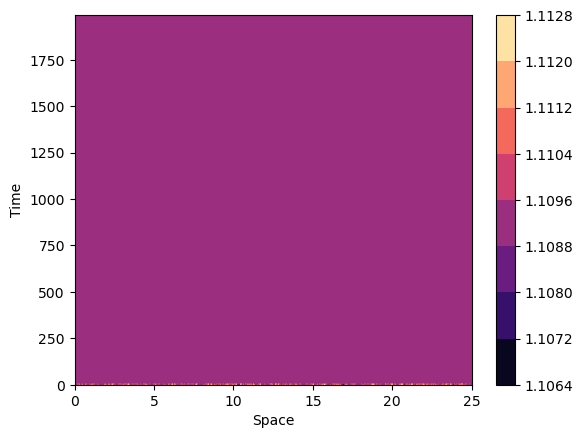

parID SSID: 3895372 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


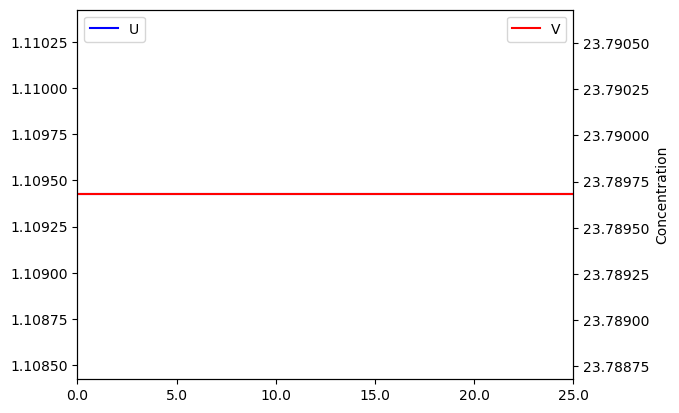

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


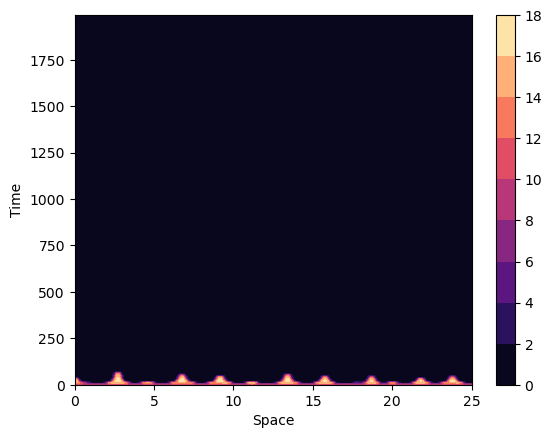

parID SSID: 3895372 2
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


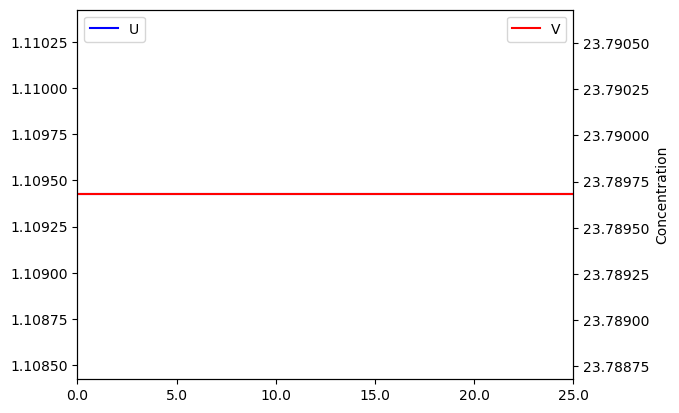

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


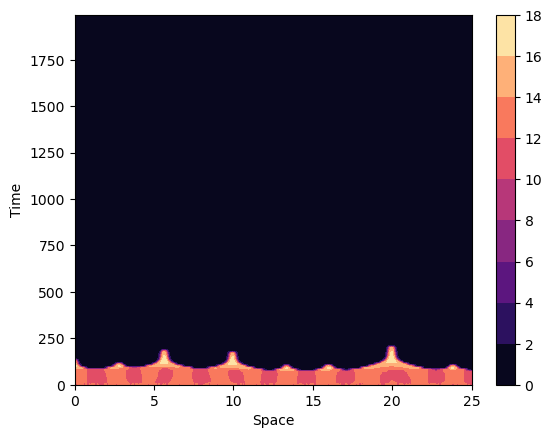




-------



parID SSID: 3983742 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


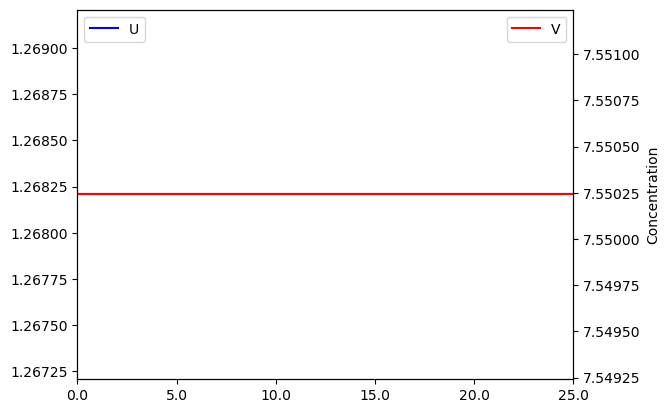

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


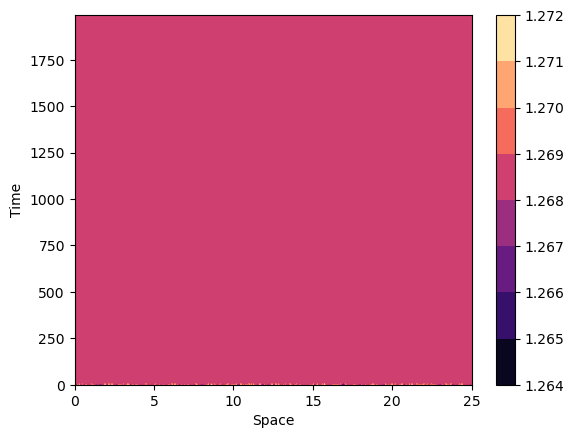

parID SSID: 3983742 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


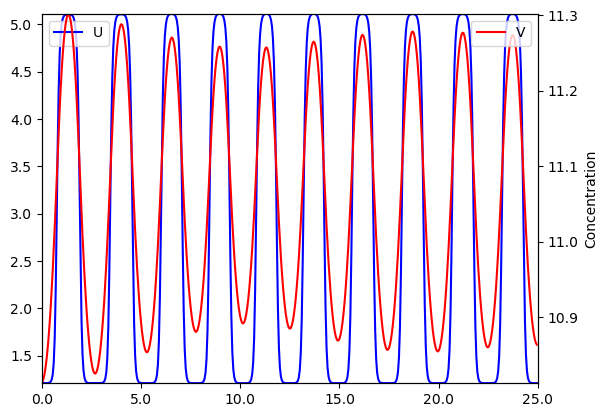

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


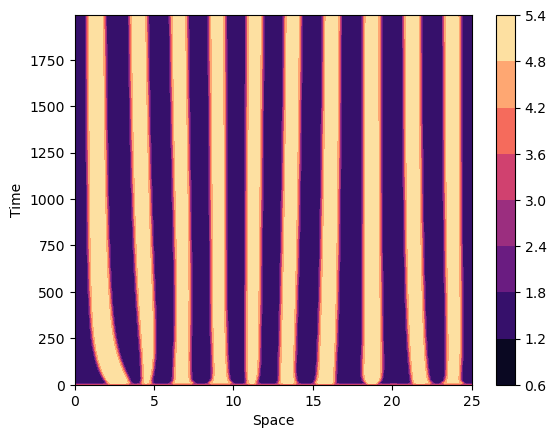

parID SSID: 3983742 2
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


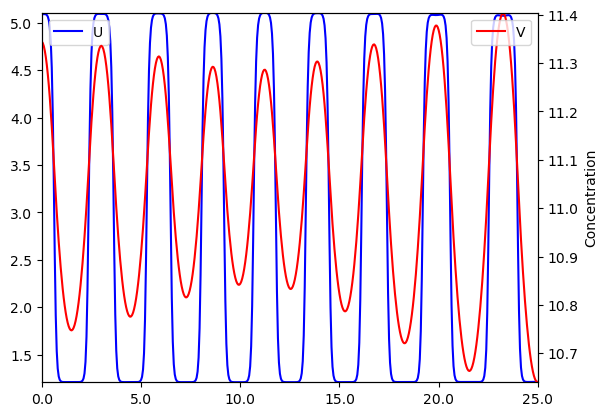

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


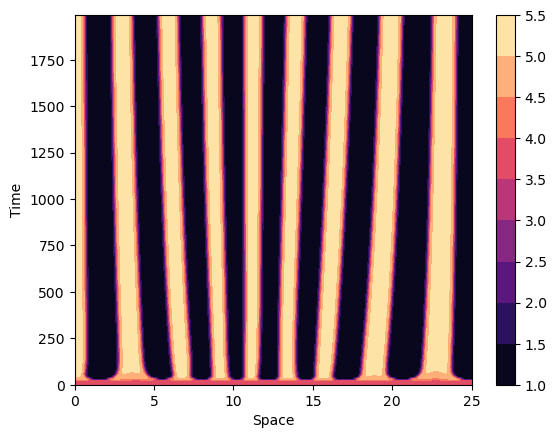




-------



parID SSID: 1863709 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


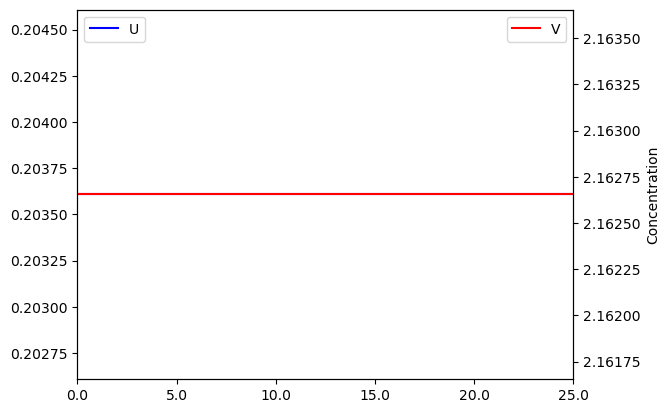

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


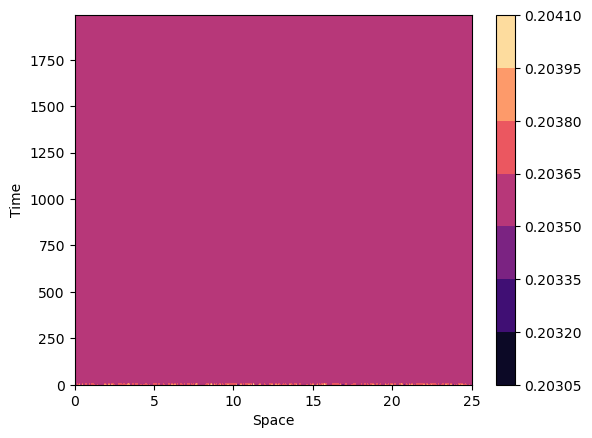

parID SSID: 1863709 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


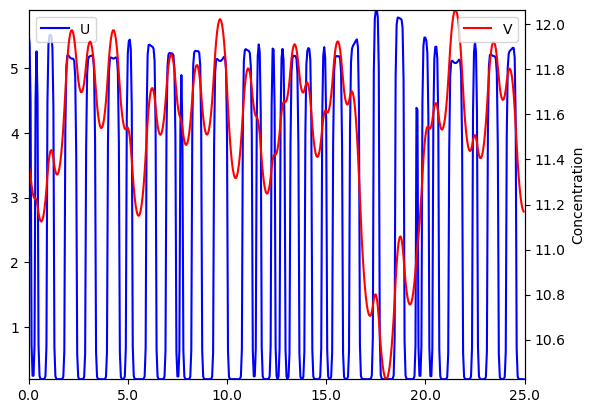

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


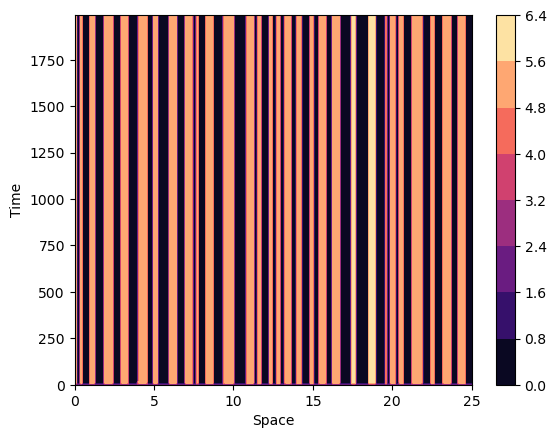

parID SSID: 1863709 2
System class: turing I hopf
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


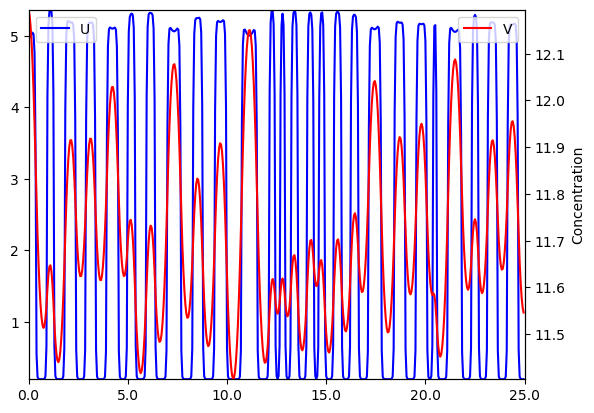

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


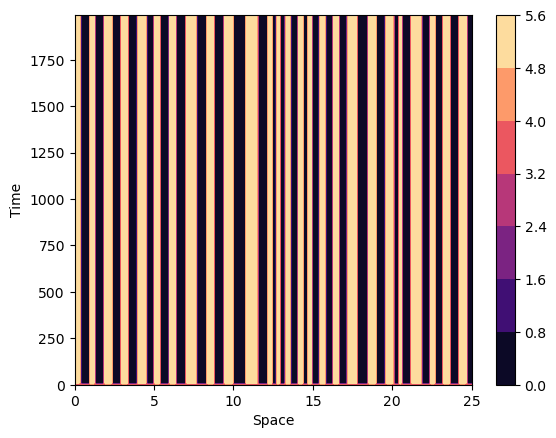




-------



parID SSID: 2579567 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


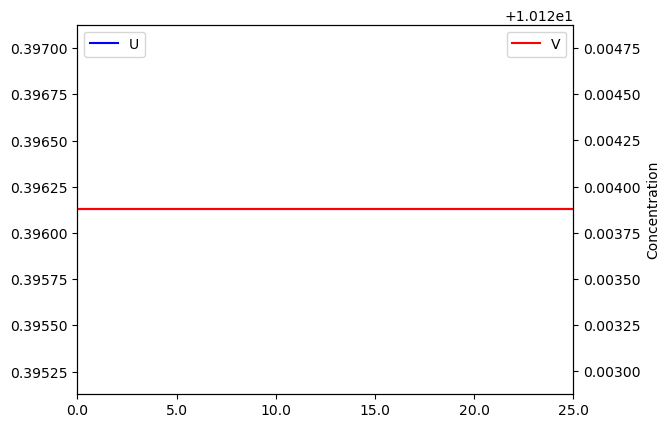

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


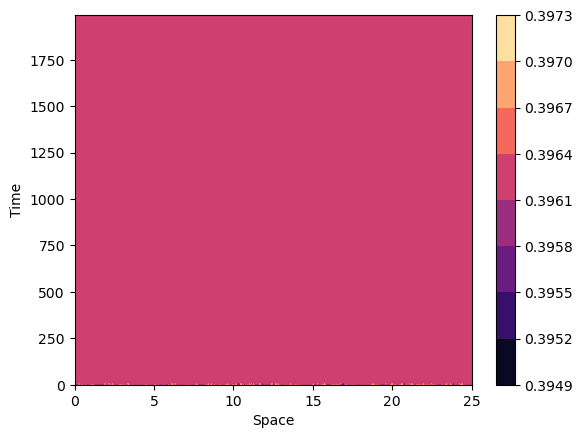

parID SSID: 2579567 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


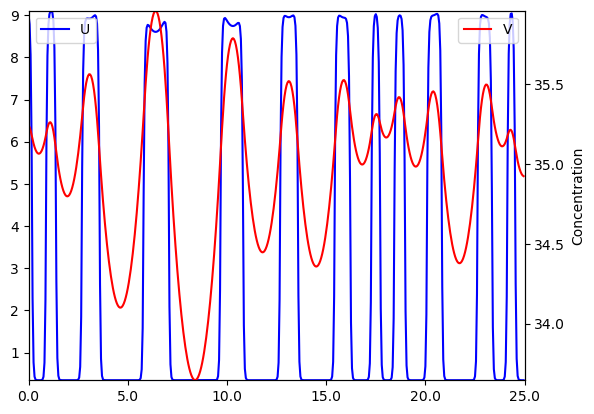

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


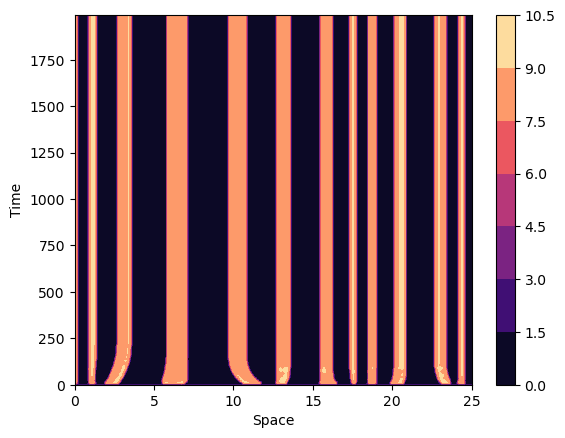

parID SSID: 2579567 2
System class: turing I hopf
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


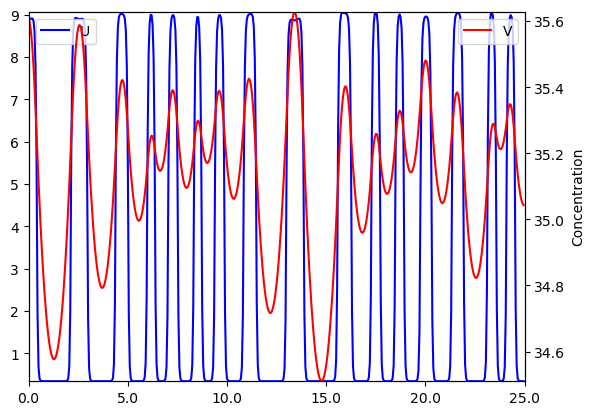

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2579567_circuit:turinghill_variant:11_samples:1000000


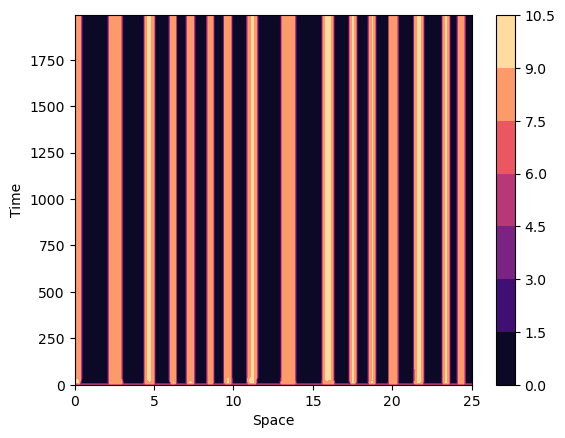




-------



parID SSID: 3314571 0
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


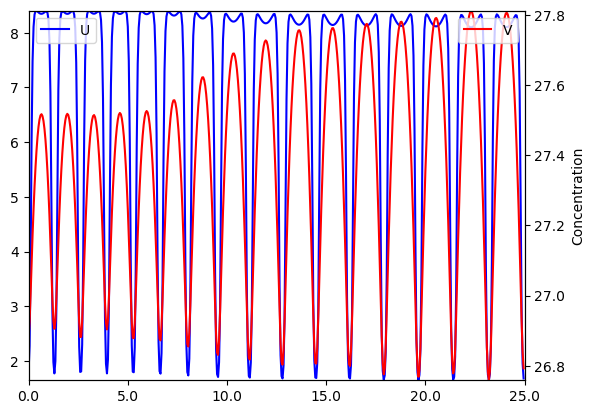

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


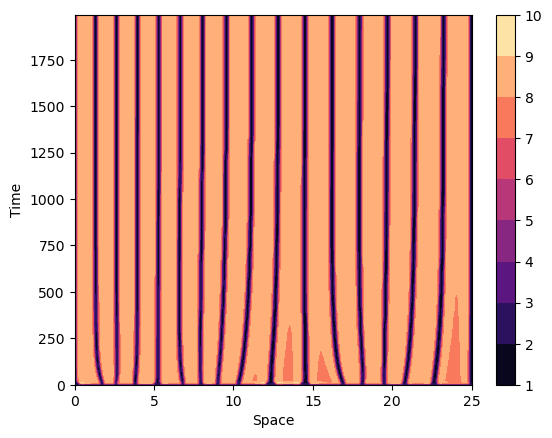

parID SSID: 3314571 1
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


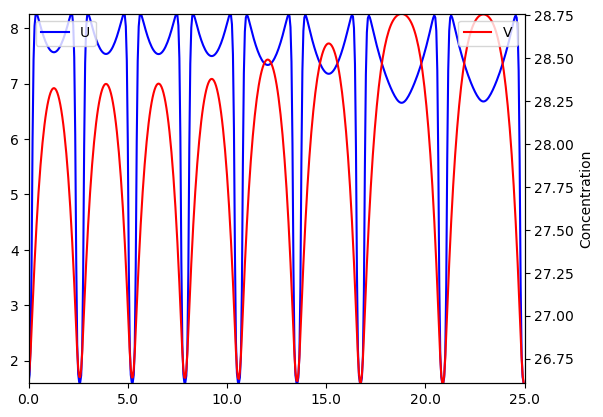

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


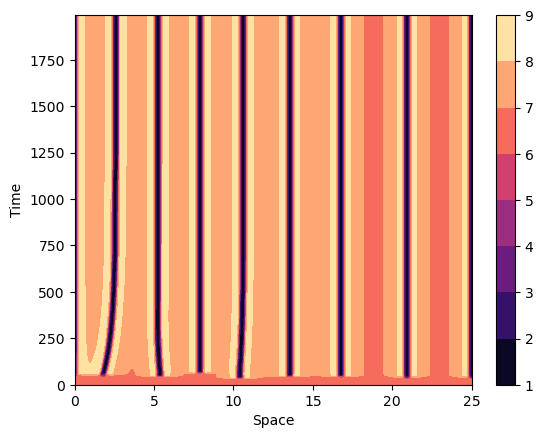

parID SSID: 3314571 2
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


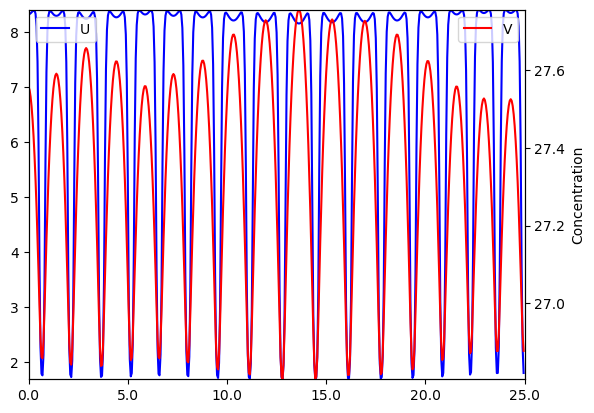

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3314571_circuit:turinghill_variant:11_samples:1000000


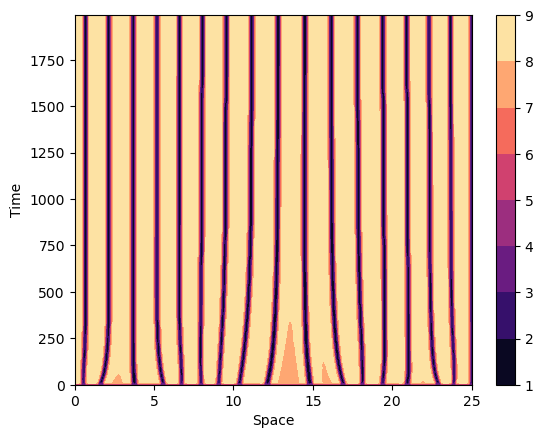




-------



parID SSID: 4183530 0
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


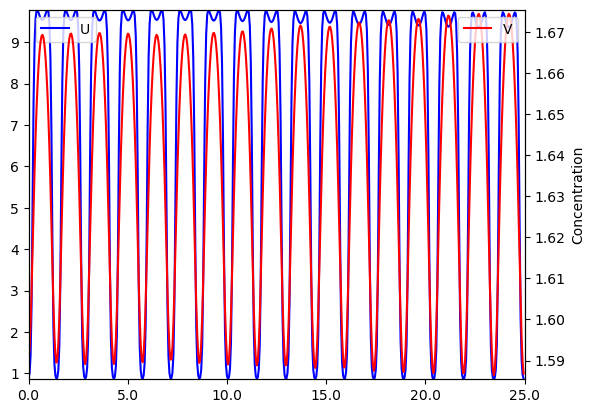

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


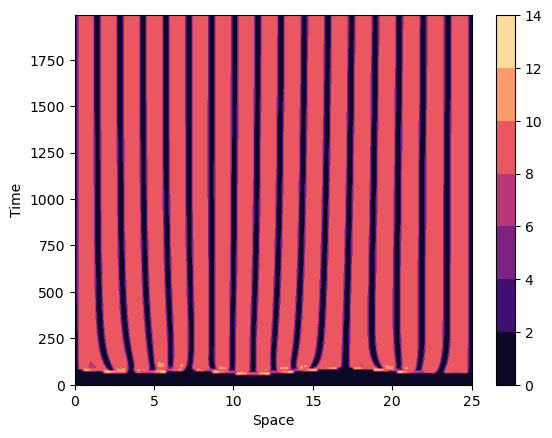

parID SSID: 4183530 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


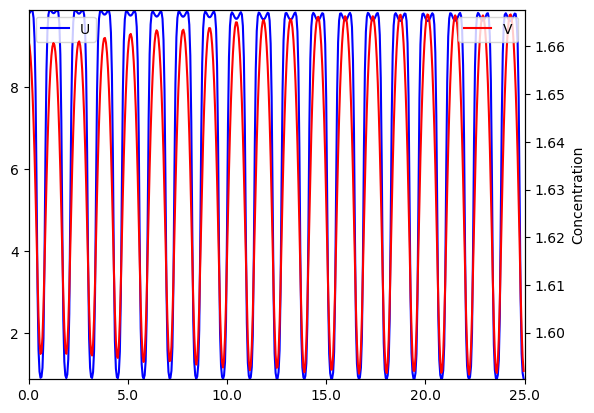

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


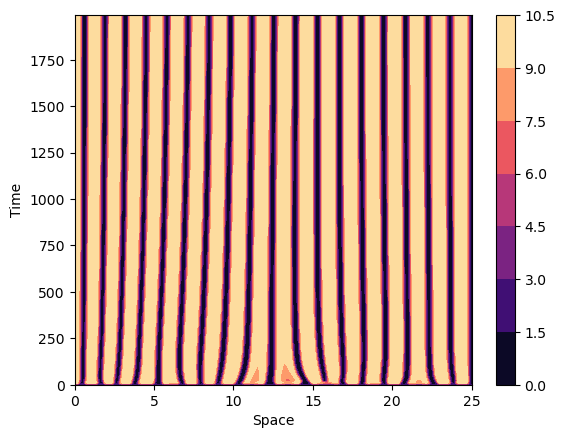

parID SSID: 4183530 2
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


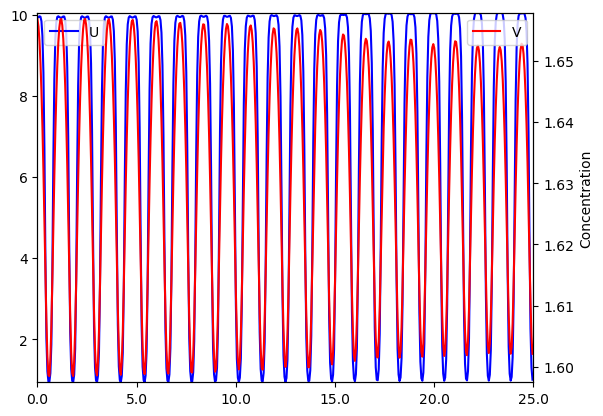

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


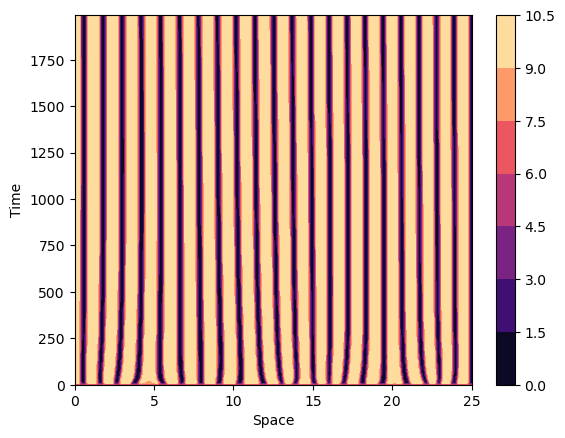




-------





In [24]:
# for parID in df.index:
for parID in [3895372, 3983742, 1863709, 2579567, 3314571, 4183530]:
    ss_n = df.loc[parID]['ss_n']
    for ssID in range(int(ss_n)): 
        
           
        print('parID SSID:', parID, ssID)
        print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
        U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
        plot1D(U_final, savefig=False,filename='')

        U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
        surfpattern(U_record,L,dx,J,T,savefig=False,filename='')
        plt.show()


    # query_and_produce_phase_diagram(parID,int(ss_n))      
    print('')
    print('')  
    print('')
    print('-------')
    print('')
    print('')
    print('')
# %%

In [7]:
def phase_diagram(system, ss_x, ss_y, system_class_list, xmin=-10, xmax=10, ymin=-10, ymax=10, phase_diagram_resolution=1000, arrow_scale=100, trajectories=False, saveFig=False, filename='', savefigpath=''):
    # Create a grid of points
    x = np.linspace(xmin, xmax, phase_diagram_resolution)
    y = np.linspace(ymin, ymax, phase_diagram_resolution)

    X, Y = np.meshgrid(x, y)

    # Compute the direction at each grid point
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    NI, NJ = X.shape
    for i in range(NI):
        for j in range(NJ):
            x = X[i, j]
            y = Y[i, j]
            dx, dy = system([x, y])
            u[i,j] = dx
            v[i,j] = dy
    magnitude = np.sqrt(u**2 + v**2)
    # Use streamplot to visualize the vector field
    plt.streamplot(X, Y, u, v, color='darkseagreen', density=1.5, linewidth=1, arrowsize=1.5, arrowstyle='->')
    # plt.imshow(magnitude, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap='autumn')
    # plt.colorbar(label='Magnitude')
    # Plot the steady state as a red dot
    for n in range(len(ss_x)):
        print(system_class_list[n])

        if system_class_list[n] == 'simple stable':
            inside_color = 'seagreen'
            edgecolor = 'seagreen'
        elif system_class_list[n] == 'simple unstable':
            inside_color = 'white'
            edgecolor = 'seagreen'
        else:
            print('a')
            inside_color = 'darkslategrey'
            edgecolor = 'darkslategrey'
        plt.scatter(ss_x[n], ss_y[n], color=inside_color, s=80, zorder=3, edgecolors=edgecolor)

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.xlabel('$U$')
    plt.ylabel('$V$')

# trajectories
    if trajectories==True:
        random_u0 = np.random.uniform(xmin,xmax,10)
        random_v0 = np.random.uniform(ymin,ymax,10)
        for uv0 in zip(random_u0,random_v0) :
            tspan = np.linspace(0, 50, 10000)

            ys = odeint(system, uv0,tspan)
            plt.plot(ys[:,0], ys[:,1], 'b-', color='darkseagreen',zorder=2) # path
            plt.plot([ys[0,0]], [ys[0,1]], 'o', color='slategrey',zorder=2) # start
            # plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

    plt.scatter(ss_x, ss_y, color='orangered', s=45)  # s sets the size of the dot
    if saveFig==True:
        plt.savefig('%s%s.pdf'%(savefigpath,filename))
        plt.show()
        plt.close()

    else:
        plt.show()
    


In [8]:
def query_and_produce_phase_diagram(parID,ss_n,pad=1.5, saveFig=False,filename='',savefigpath=''):
    u_ss=[];v_ss=[];system_class_list=[]
    for ssID in range(ss_n):
        system_class, ss_list = general_query(query_system_class(parID,ssID))[0][0]
        ss_list = np.array(ss_list, dtype='float64')
        system_class_list.append(system_class)
        u_ss.append(ss_list[0]); v_ss.append(ss_list[1])
    par_dict = model_param_df.loc[parID]
    print(u_ss)
    # phase_diagram(turinghill(par_dict).dudt,u_ss,v_ss,xmin=np.amin(u_ss)-pad,xmax=np.amax(u_ss)+pad,ymin=np.amin(v_ss)-pad,ymax=np.amax(v_ss)+pad,phase_diagram_resolution=30,arrow_scale=40)
    phase_diagram(turinghill(par_dict).dudt,u_ss,v_ss,system_class_list,xmin=np.amin(u_ss)-pad,xmax=np.amax(u_ss)+pad,ymin=np.amin(v_ss)-pad,ymax=np.amax(v_ss)+pad,phase_diagram_resolution=40,arrow_scale=50,  saveFig=saveFig,filename=filename,savefigpath=savefigpath, trajectories=False)
    plt.show()


parID SSID: 3895372 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


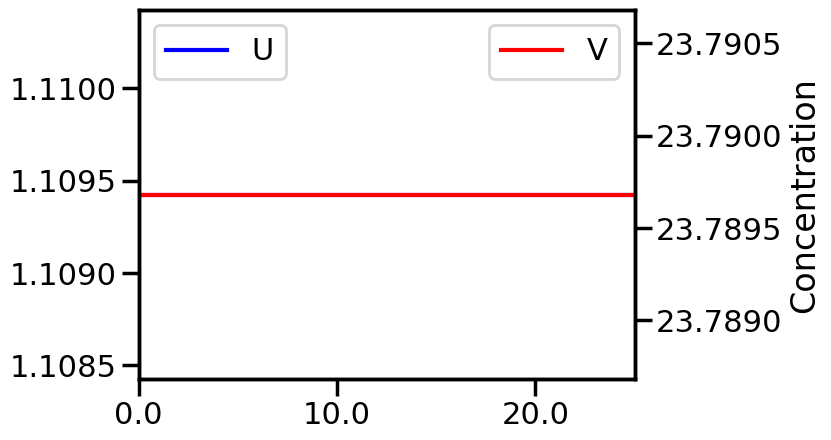

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


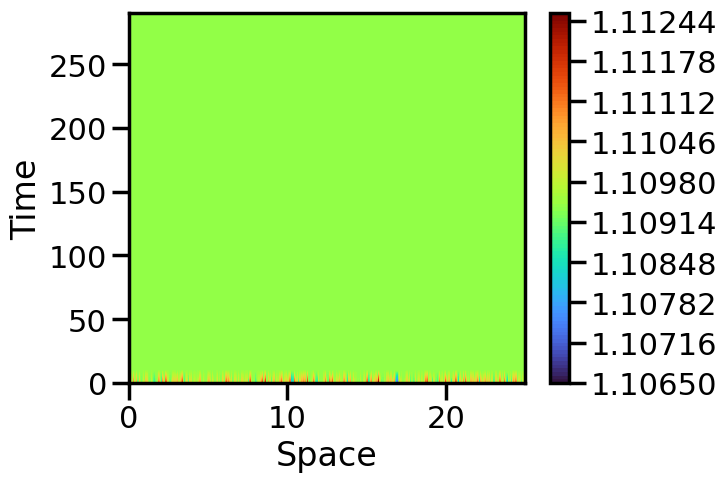

parID SSID: 3895372 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


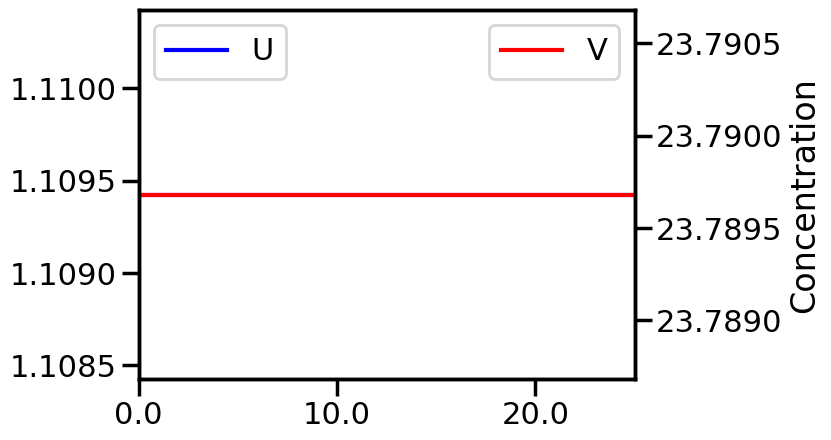

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


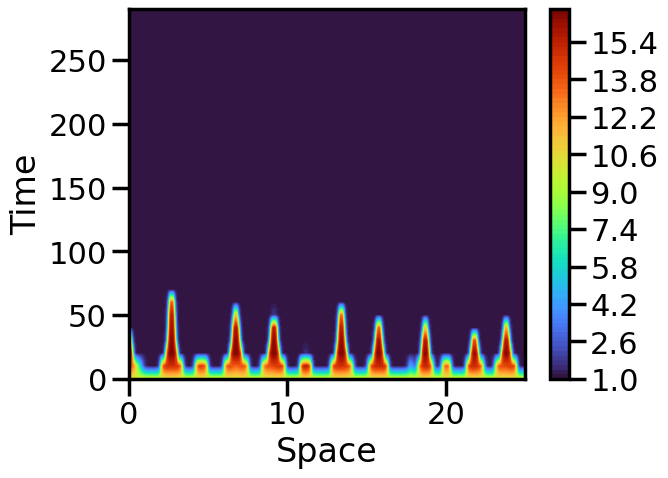

parID SSID: 3895372 2
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


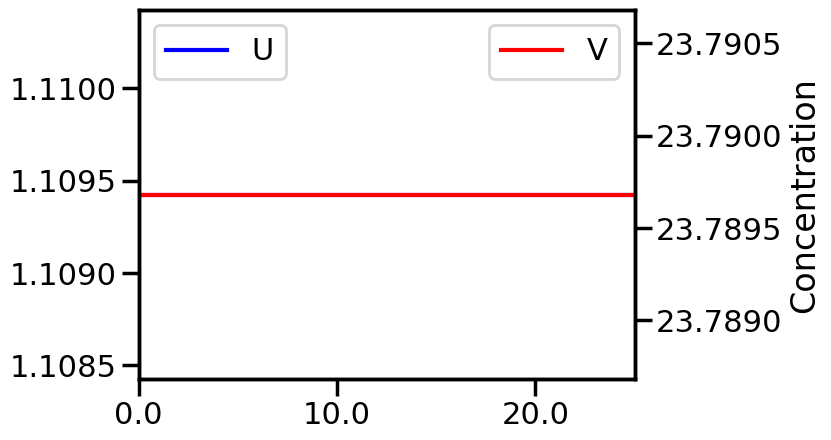

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3895372_circuit:turinghill_variant:11_samples:1000000


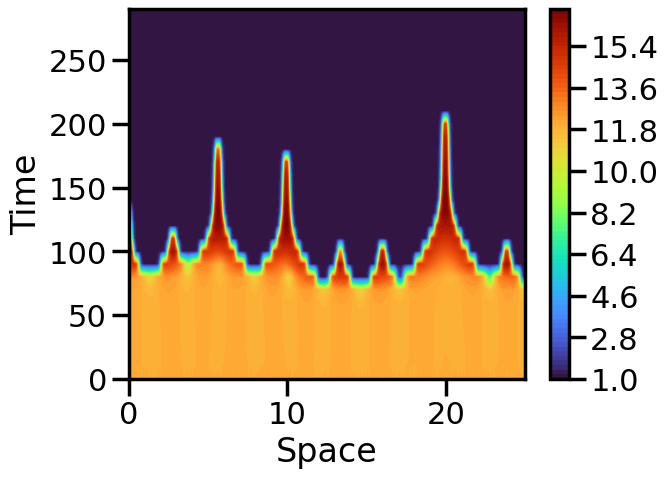

[1.1094, 9.984, 11.9997]
simple stable
simple unstable
turing I
a


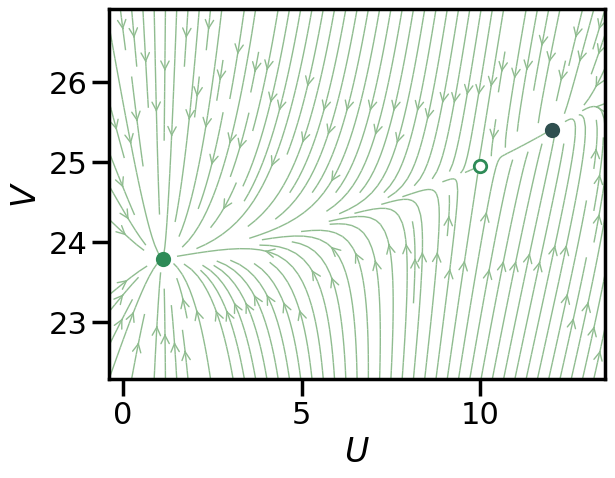

3.0

In [19]:
sns.set_context("poster")
parID = 3895372
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/ephemeral_pattern/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record[:,:30,:],L,dx,J,300,savefig=True,cmap=my_cmap, filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/ephemeral_pattern/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=1.5, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/ephemeral_pattern/')
ss_n

parID SSID: 3983742 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


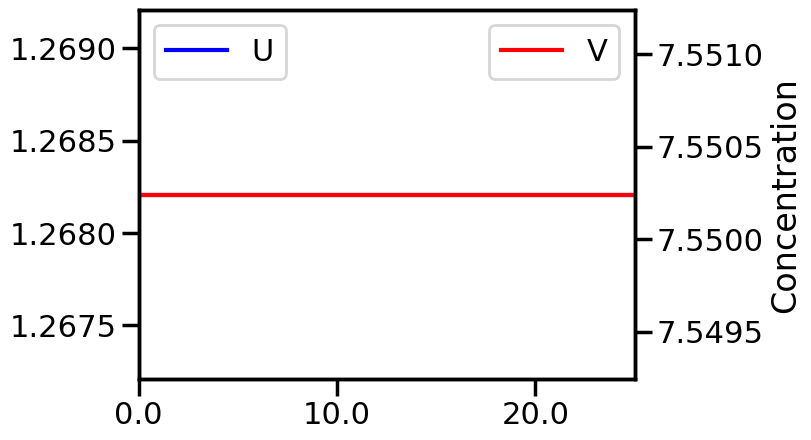

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


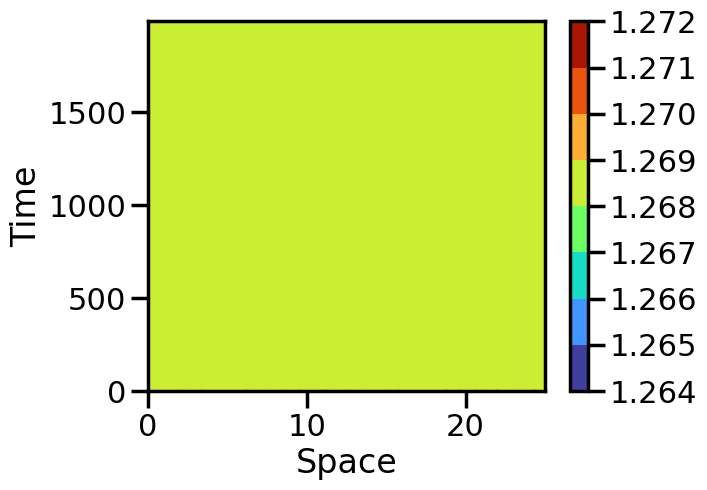

parID SSID: 3983742 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


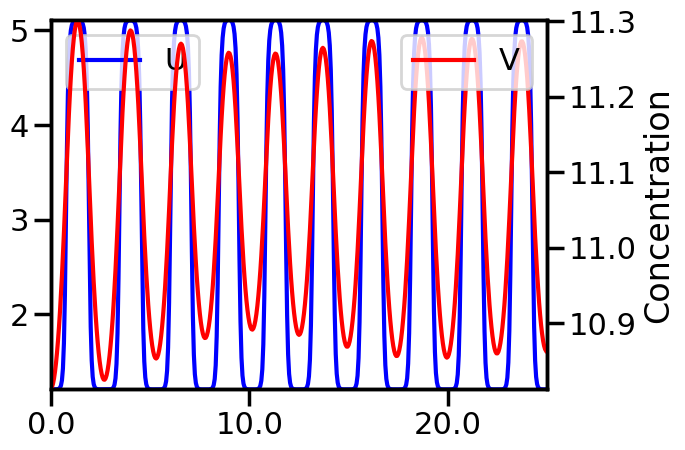

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


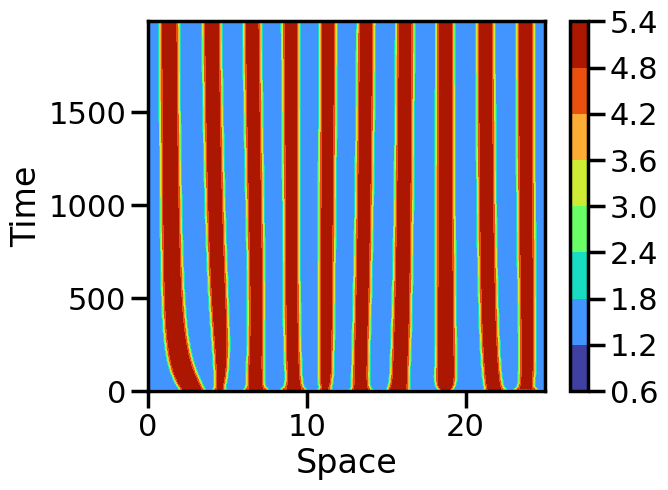

parID SSID: 3983742 2
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


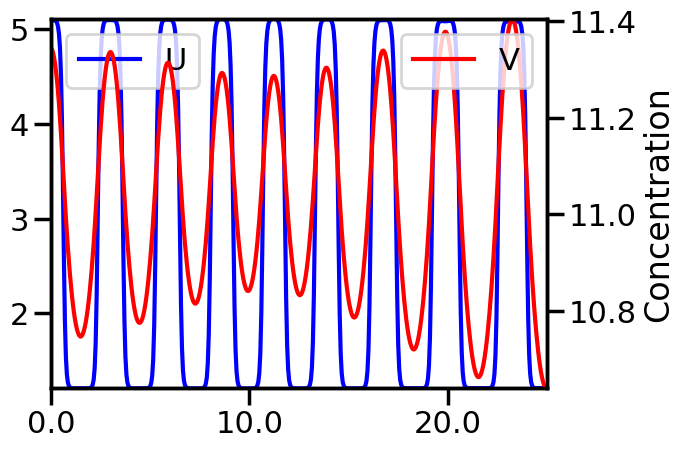

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


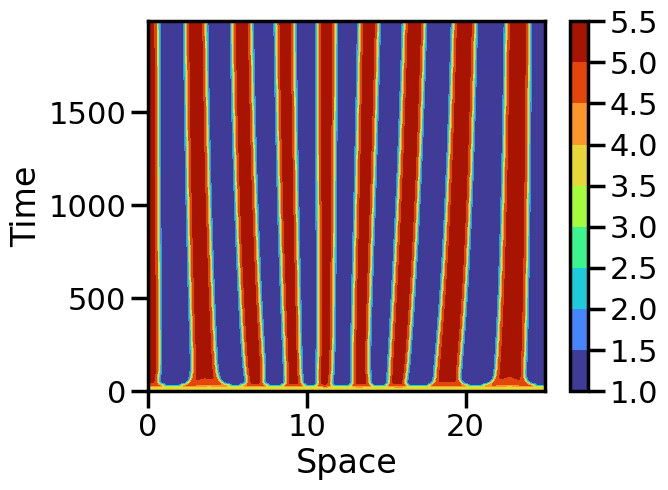

[1.2682, 3.0907, 3.7949]
simple stable
simple unstable
turing I oscillatory
a


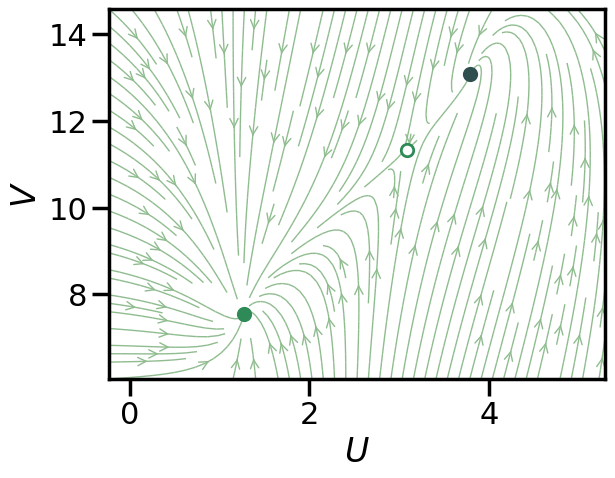

3.0

In [10]:
parID = 3983742
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_stable_unstable/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,cmap=my_cmap, savefig=True,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_stable_unstable/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=1.5, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_stable_unstable/')
ss_n

parID SSID: 1863709 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


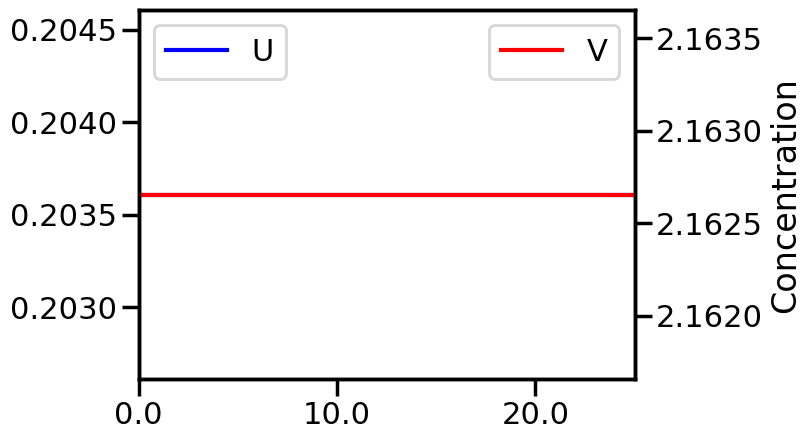

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


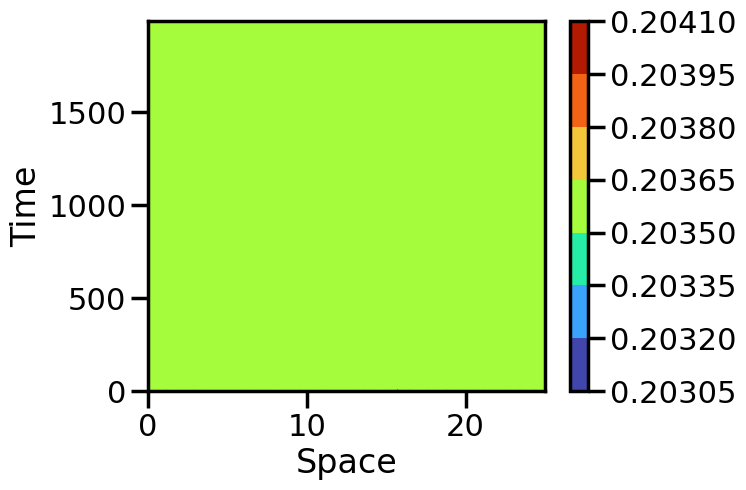

parID SSID: 1863709 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


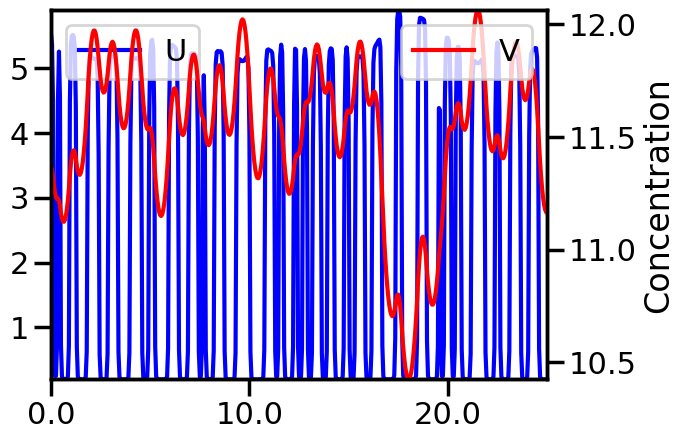

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


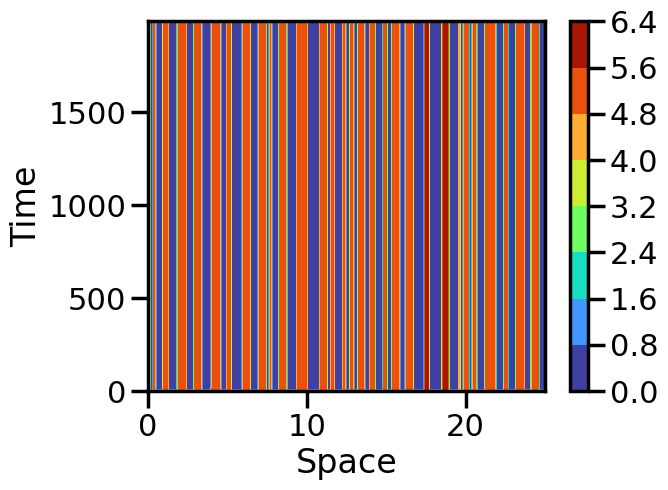

parID SSID: 1863709 2
System class: turing I hopf
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


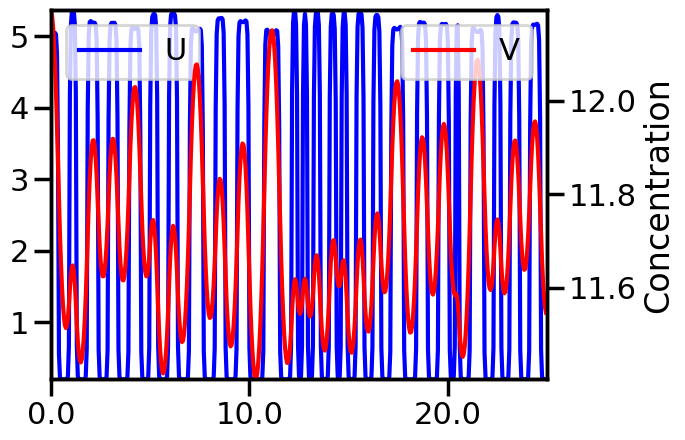

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:1863709_circuit:turinghill_variant:11_samples:1000000


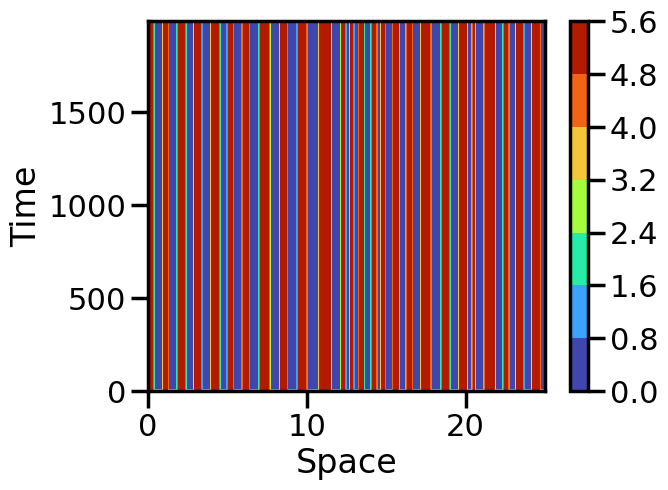

[0.2036, 1.7065, 3.2854]
simple stable
simple unstable
turing I hopf
a


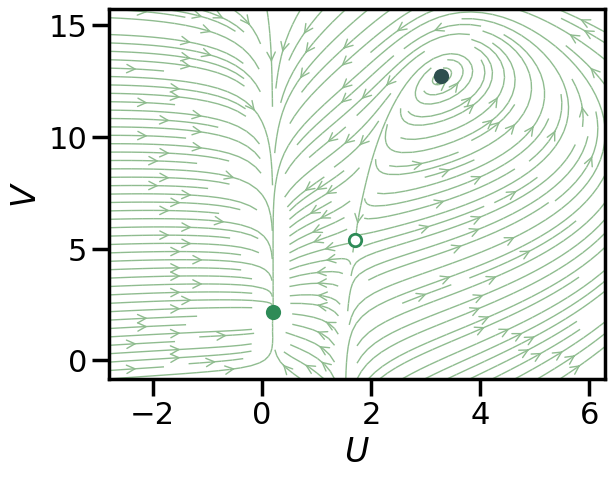

3.0

In [12]:
parID = 1863709
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_hopf_multistable/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,cmap=my_cmap, savefig=True,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_hopf_multistable/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=3, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turing_hopf_multistable/')
ss_n

parID SSID: 4183530 0
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


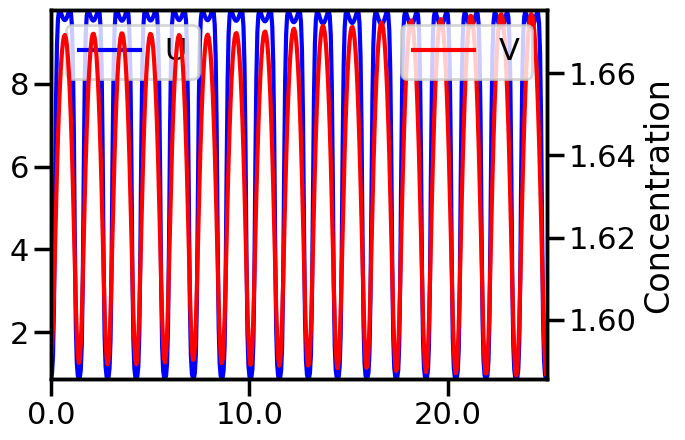

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


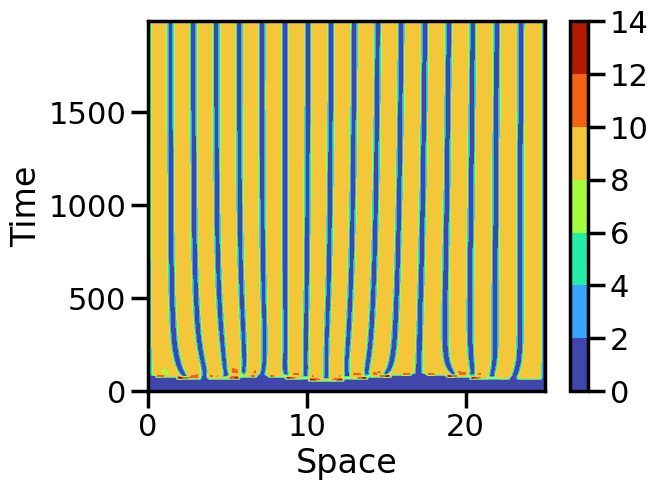

parID SSID: 4183530 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


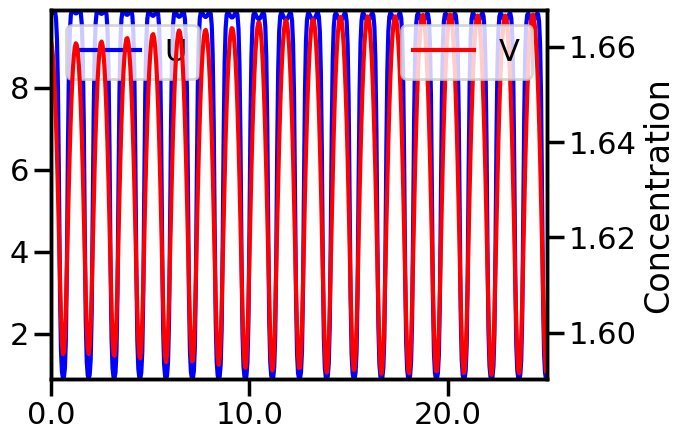

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


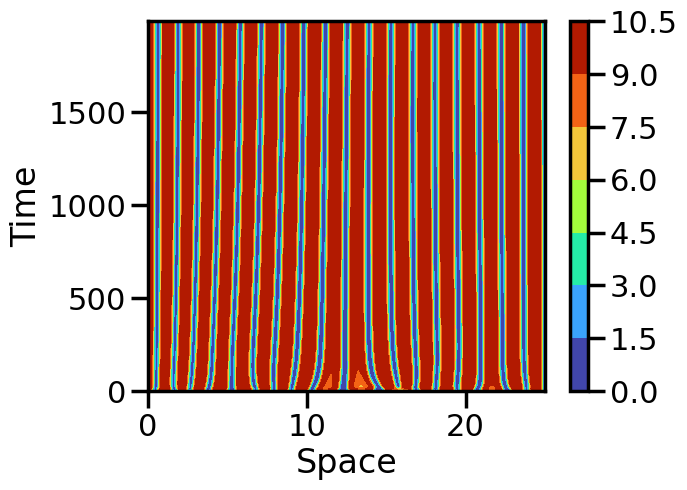

parID SSID: 4183530 2
System class: turing I
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


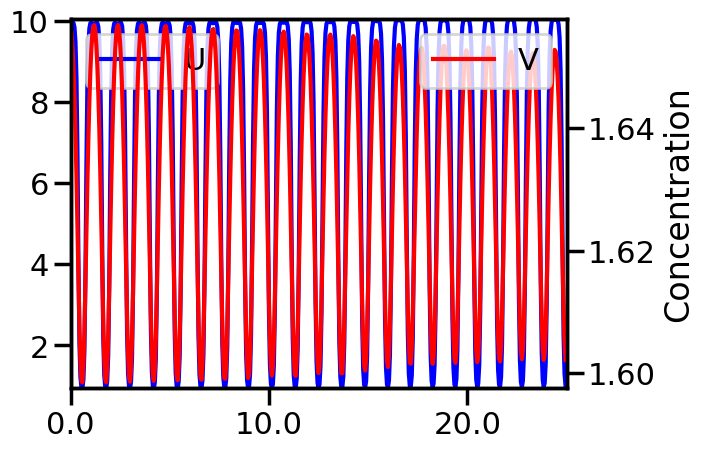

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:4183530_circuit:turinghill_variant:11_samples:1000000


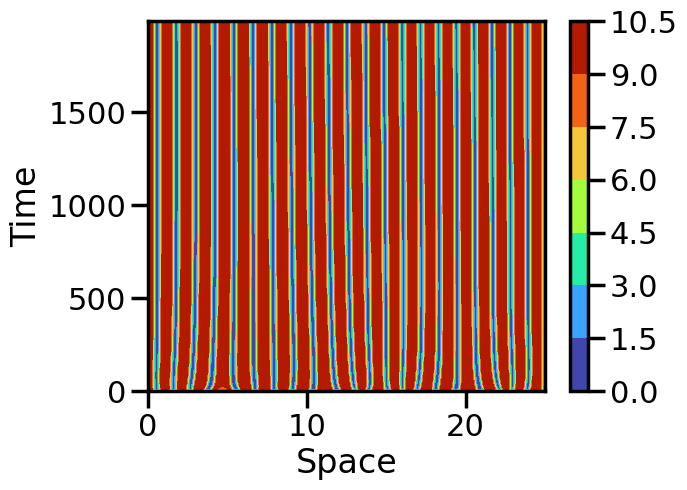

[1.3848, 1.7516, 5.4588]
turing I
a
simple unstable
turing I
a


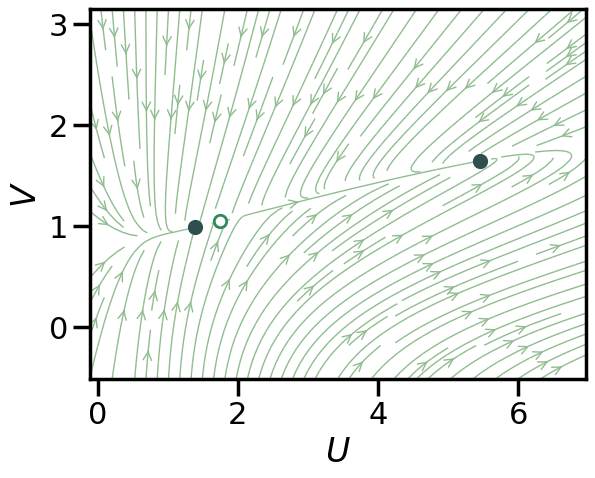

3.0

In [14]:

parID = 4183530
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turingx2_multistable/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,cmap=my_cmap, savefig=True,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turingx2_multistable/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=1.5, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/turingx2_multistable/')
ss_n

parID SSID: 2213414 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


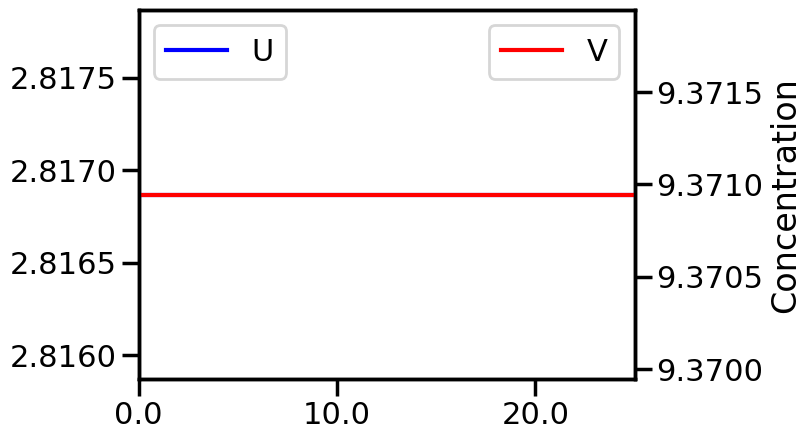

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


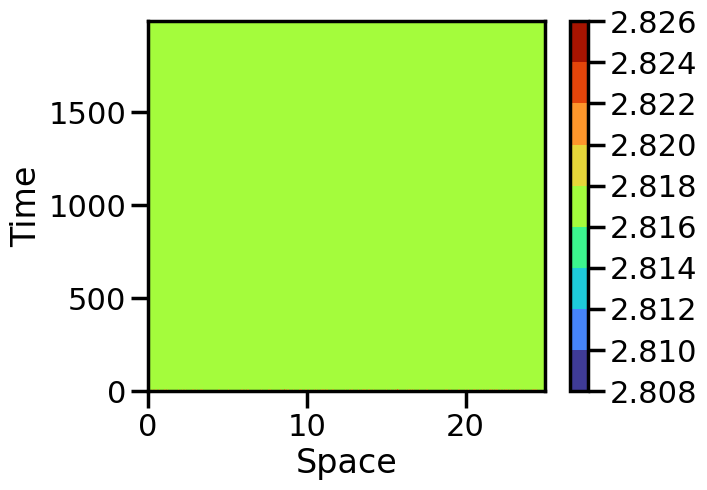

parID SSID: 2213414 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


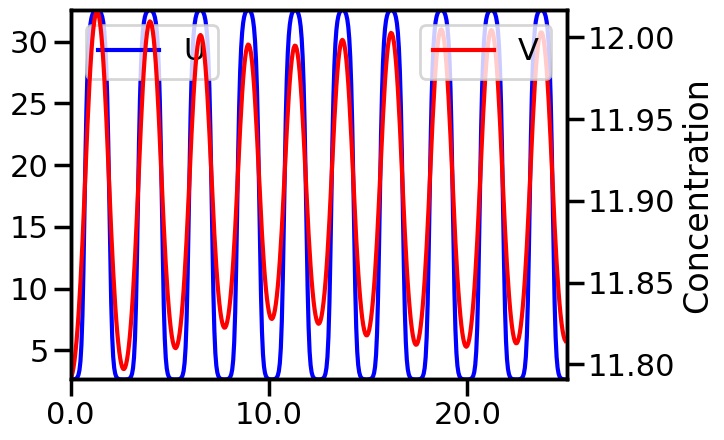

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


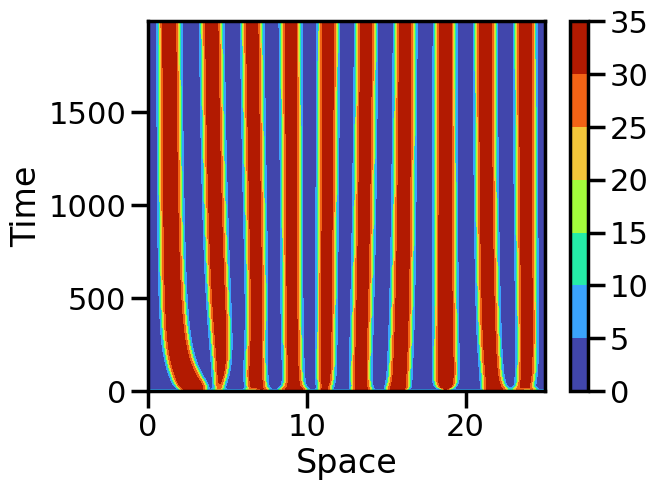

parID SSID: 2213414 2
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


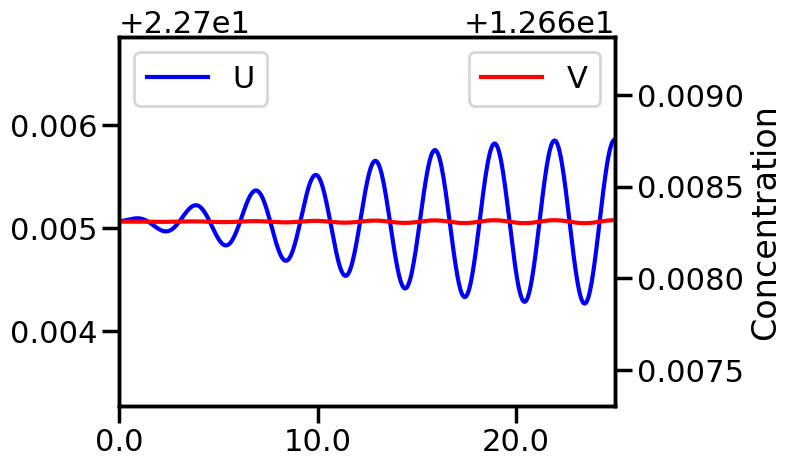

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2213414_circuit:turinghill_variant:11_samples:1000000


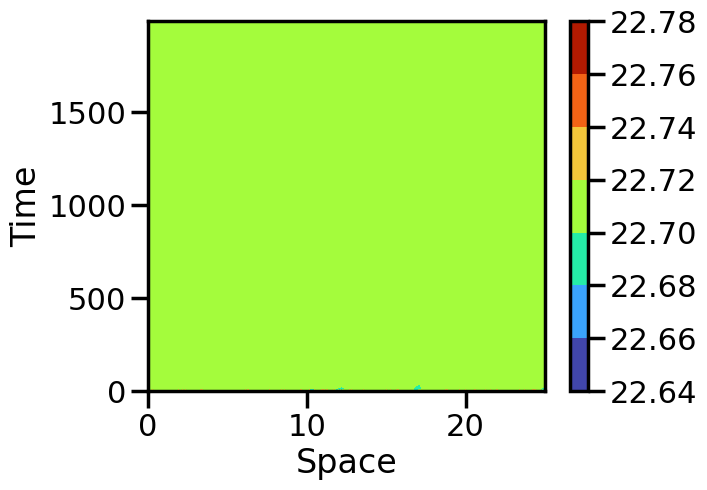

[2.8169, 11.9926, 22.7051]
simple stable
simple unstable
turing I oscillatory
a


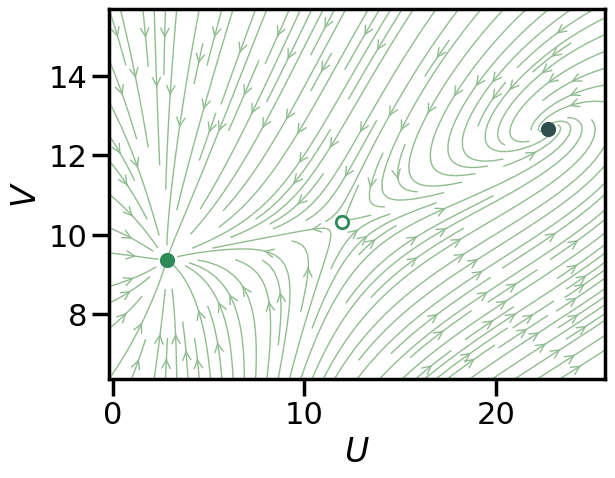

3.0

In [15]:

parID = 2213414
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/unstable_patter_turing_nopattern/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,cmap=my_cmap, savefig=True,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/unstable_patter_turing_nopattern/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=3, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/unstable_patter_turing_nopattern/')
ss_n

parID SSID: 480517 0
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


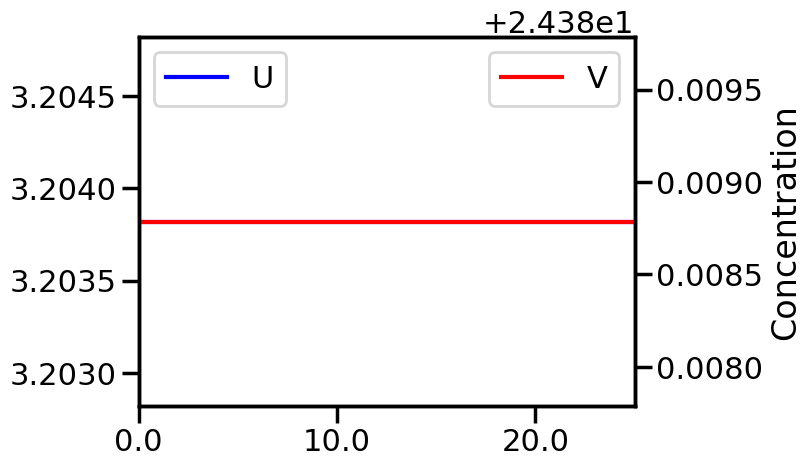

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


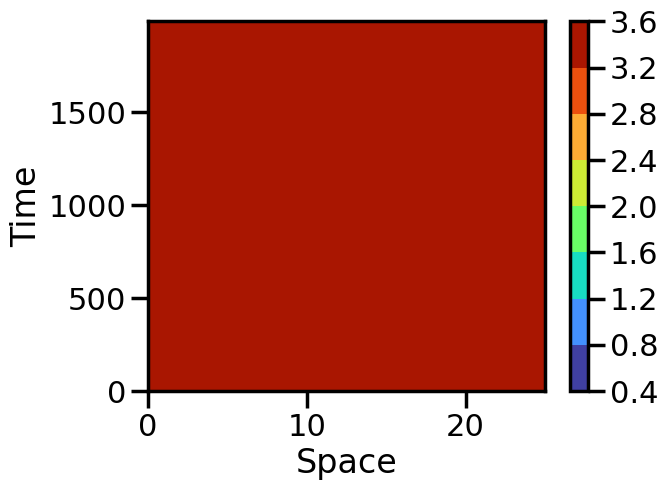

parID SSID: 480517 1
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


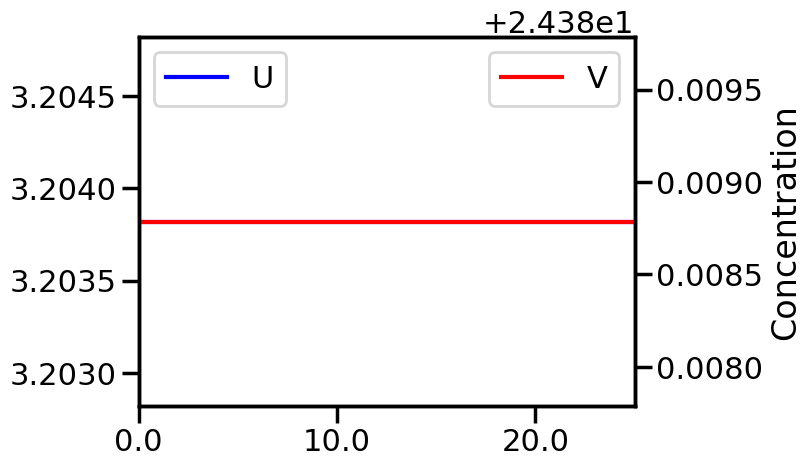

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


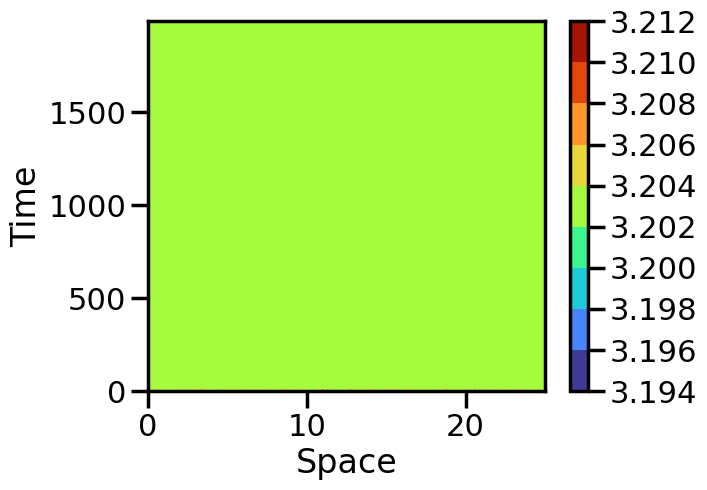

parID SSID: 480517 2
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


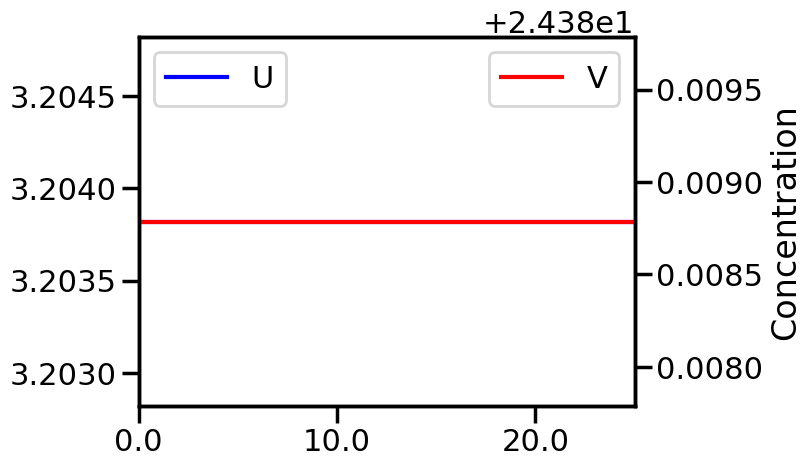

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:480517_circuit:turinghill_variant:11_samples:1000000


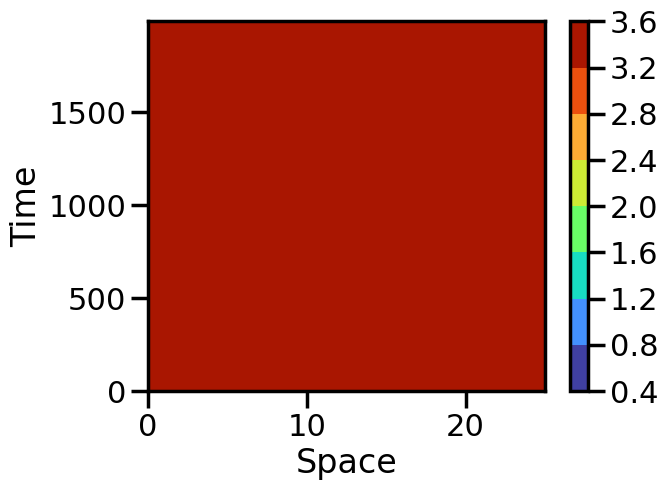

[0.616, 3.2038, 0.7684]
turing I oscillatory
a
simple stable
simple unstable


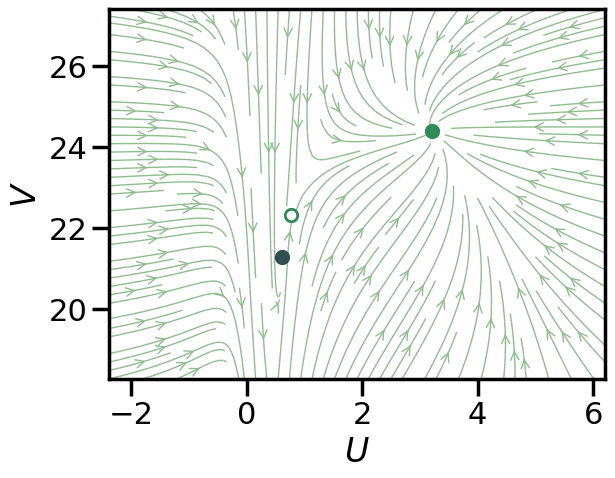

3.0

In [16]:

parID = 480517
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=True,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/no_pattern/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,cmap=my_cmap, savefig=True,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/no_pattern/')

query_and_produce_phase_diagram(parID,int(ss_n),pad=3, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/no_pattern/')
ss_n

In [10]:
from analytical.findsteadystates_functions import findsteadystates
from analytical.dispersionrelation_functions import dispersionrelation
def detailed_turing_analysis_dict1(par_dict, circuit_n,n_species,top_dispersion=5000,calculate_unstable=False,steadystate=False):
    if np.any(steadystate)==False:
        steadystatelist, number_steadystates = findsteadystates(par_dict, circuit_n,n_species,n_initial_conditions=100) #input a dictionary with the parameters and returns (1) a list with the steady states and (2) the number of steady states.
    else:
        steadystatelist = []
        steadystatelist.append(steadystate)
        number_steadystates = len(steadystatelist)

        
    system_class_list = []
    maxeig_list = []
    system_class_list = []
    ss_class_list = []
    eigenvalues_list=[]
    maxeig_list = []
    complex_dispersion_list = []


    if number_steadystates > 0:
        for ss_n in range(number_steadystates): #perform linear stability analysis on all steady states found
            steadystate_values_ss_n = steadystatelist[ss_n]
            ss_class, system_class, eigenvalues, maxeig,estimated_wvl, complex_dispersion= dispersionrelation(par_dict,steadystate_values_ss_n, circuit_n,top_dispersion)
            system_class_list.append(system_class)
            ss_class_list.append(system_class)
            eigenvalues_list.append(eigenvalues)
            maxeig_list.append(maxeig)
            complex_dispersion_list.append(complex_dispersion)

    else:
        eigenvalues=[]
    return steadystatelist, number_steadystates, ss_class_list, system_class_list, eigenvalues_list, maxeig_list, complex_dispersion_list, estimated_wvl


parID SSID: 2956064 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


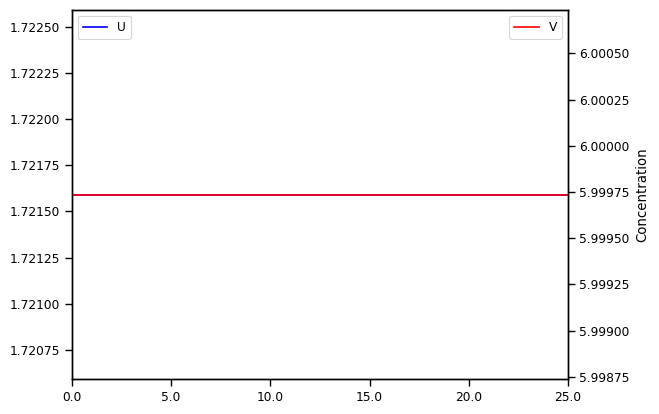

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


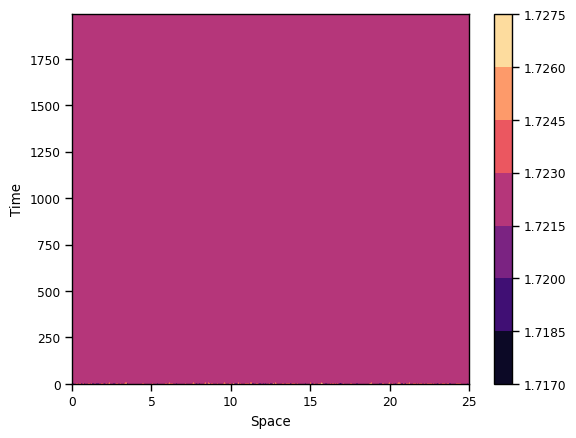

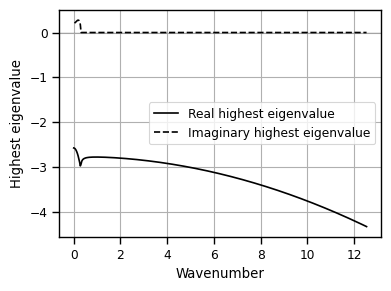

maxwvn 2.857142857142857
parID SSID: 2956064 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


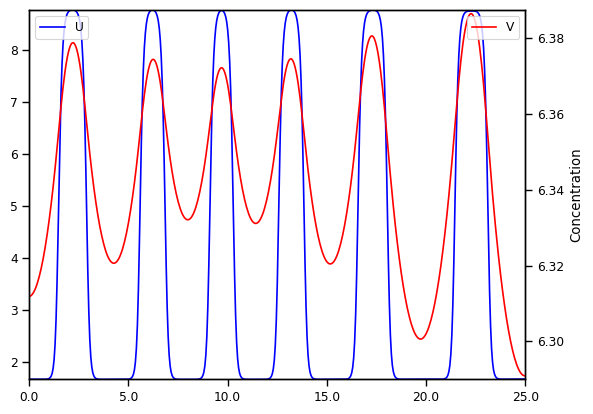

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


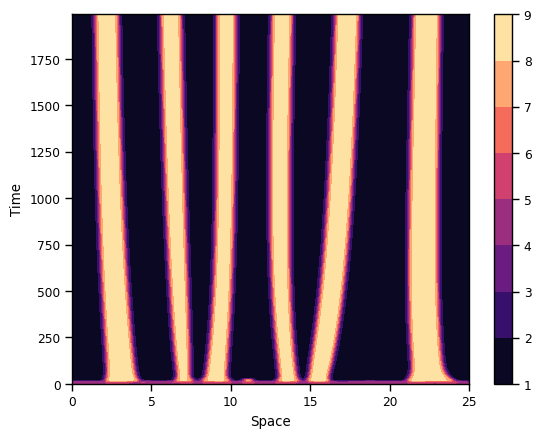

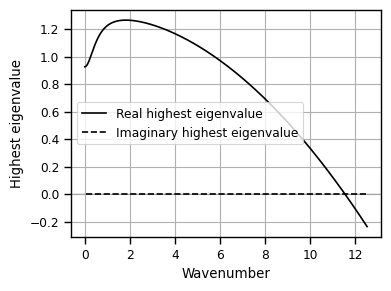

maxwvn 2.857142857142857
parID SSID: 2956064 2
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


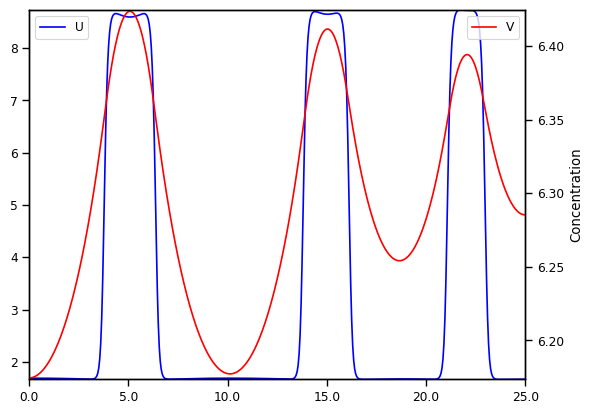

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:2956064_circuit:turinghill_variant:11_samples:1000000


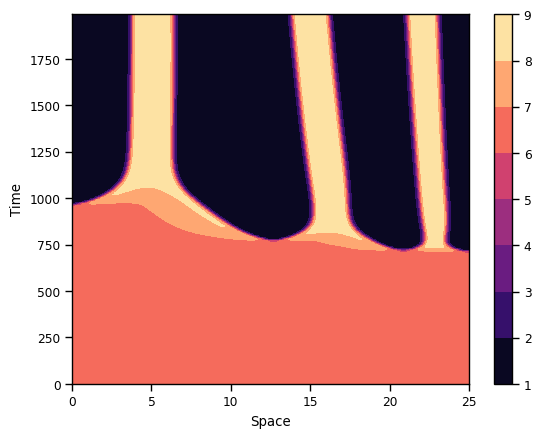

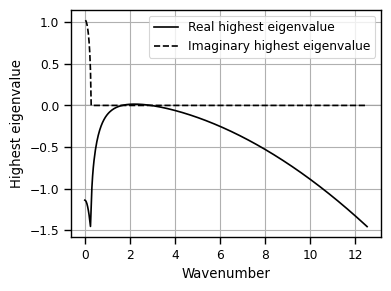

maxwvn 2.857142857142857
[1.7216, 4.9313, 6.5975]
simple stable
simple unstable
turing I oscillatory
a


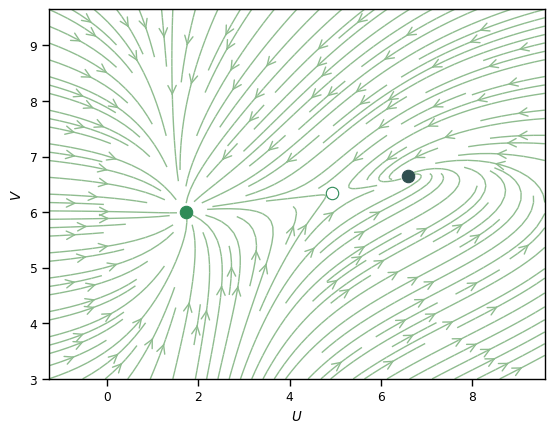

3.0

In [107]:

from analytical.linear_stability_analysis import big_turing_analysis_df, detailed_turing_analysis_dict
from randomfunctions import plot_all_dispersion, plot_highest_dispersion
sns.set_context("paper")
parID = 2956064
ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=False,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    surfpattern(U_record,L,dx,J,T,savefig=False,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')

    par_dict = model_param_df.loc[parID]
    out = detailed_turing_analysis_dict1(par_dict, circuit_n, 2)
    plot_highest_dispersion(out[4][ssID],crop = 400, top = 2000)
    plt.show()

    print('maxwvn', out[7])
    #     out = detailed_turing_analysis_dict(par_dict, circuit_n, 2)
    # plot_all_dispersion(out[4][0],2, crop=100)
    #     out = detailed_turing_analysis_dict(par_dict, circuit_n, 2)
    # plot_all_dispersion(out[4][0],2, crop=100)
query_and_produce_phase_diagram(parID,int(ss_n),pad=3, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')
ss_n

parID SSID: 3983742 0
System class: simple stable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


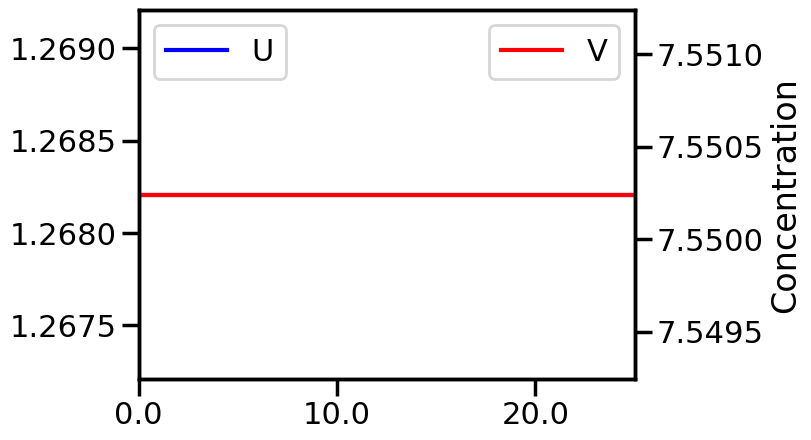

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


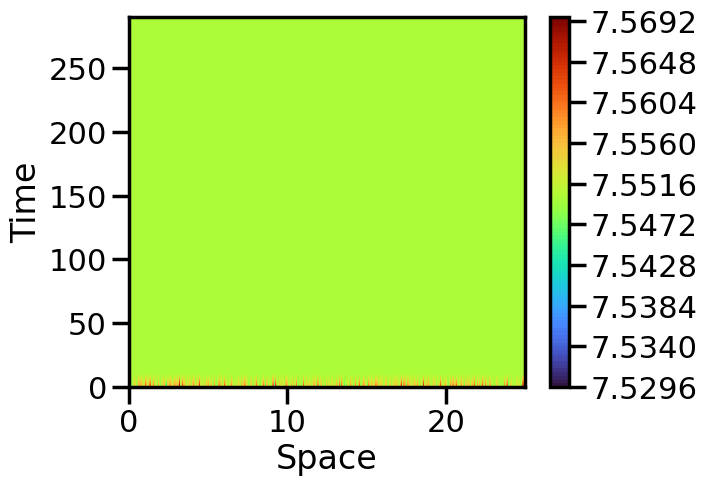

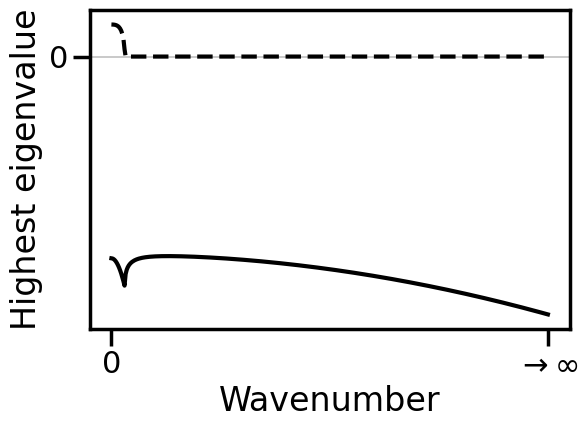

maxwvn 1.9801980198019804
parID SSID: 3983742 1
System class: simple unstable
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


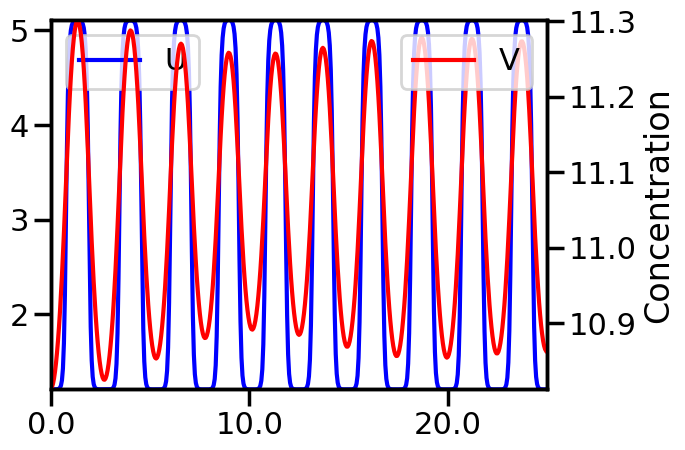

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


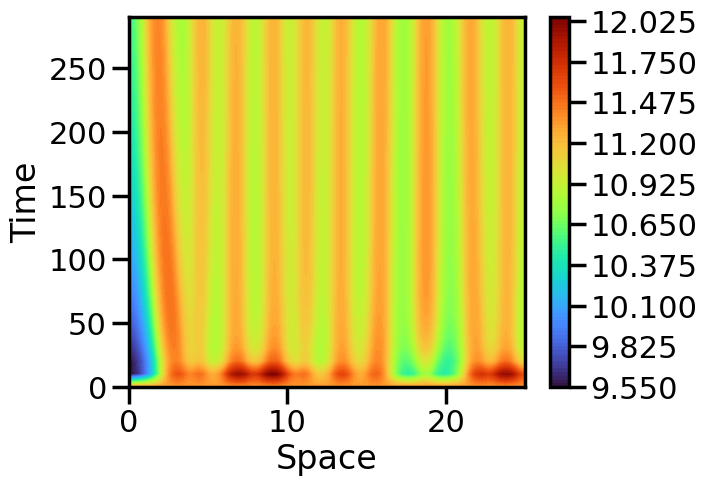

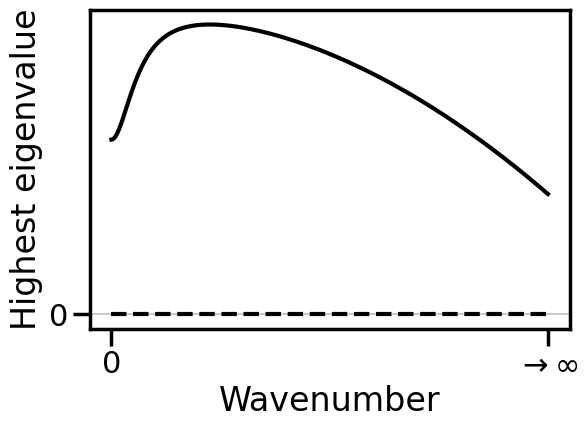

maxwvn 1.9801980198019804
parID SSID: 3983742 2
System class: turing I oscillatory
simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


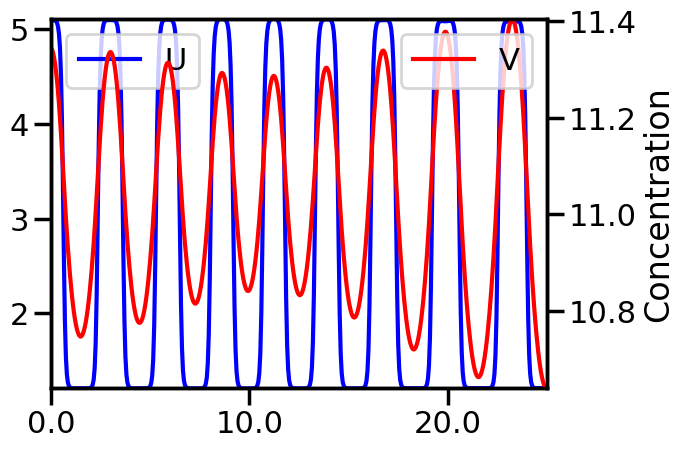

simulation_param_uuid:('132323a4-3f93-4287-aca9-d18e84848e37',)
model_param_id:3983742_circuit:turinghill_variant:11_samples:1000000


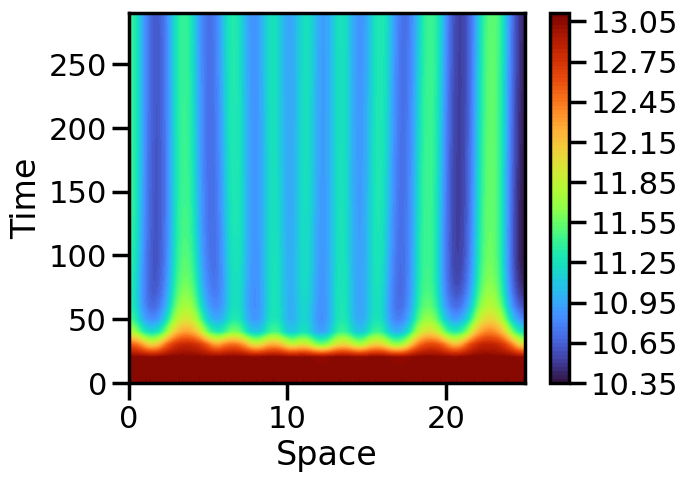

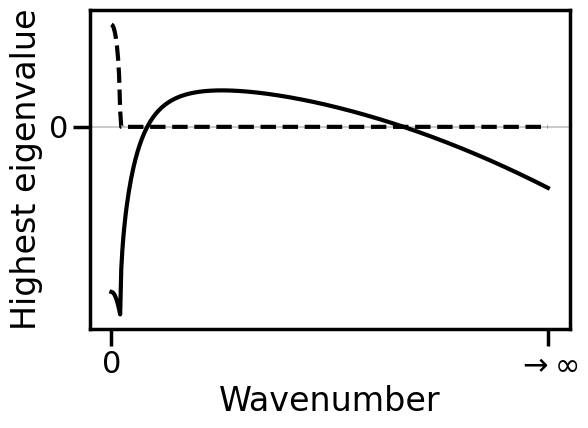

maxwvn 1.9801980198019804


3.0

In [20]:

from analytical.linear_stability_analysis import big_turing_analysis_df, detailed_turing_analysis_dict
from randomfunctions import plot_all_dispersion, plot_highest_dispersion, plot_highest_dispersion_noticks
sns.set_context("poster")
# parID = 3895372
parID = 3983742

ss_n = df.loc[parID]['ss_n']
for ssID in range(int(ss_n)): 
    
        
    print('parID SSID:', parID, ssID)
    print('System class:' , general_query(query_system_class(parID,ssID))[0][0][0])
    U_final = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_final_1D', ssID=ssID)
    plot1D(U_final, savefig=False,filename=f'{parID}_{ssID}_1Dfinal_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')
    
    U_record = query_simulationOutput_single_from_sql(simulation_param_dict,model_param_dict(parID),'U_record_1D', ssID=ssID)
    # surfpattern(U_record,L,dx,J,T,savefig=False,filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')
    surfpattern(U_record[:,:30,:],L,dx,J,300, morphogen=1, savefig=True,cmap=my_cmap, filename=f'{parID}_{ssID}_1Drecord_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/ephemeral_pattern/')

    par_dict = model_param_df.loc[parID]
    out = detailed_turing_analysis_dict1(par_dict, circuit_n, 2)
    plot_highest_dispersion_noticks(out[4][ssID],crop = 400, top = 2000)
    plt.savefig(f'/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/ephemeral_pattern/{parID}_{ssID}_highest_dispersion.pdf')

    plt.show()

    print('maxwvn', out[7])
    #     out = detailed_turing_analysis_dict(par_dict, circuit_n, 2)
    # plot_all_dispersion(out[4][0],2, crop=100)
    #     out = detailed_turing_analysis_dict(par_dict, circuit_n, 2)
    # plot_all_dispersion(out[4][0],2, crop=100)
# query_and_produce_phase_diagram(parID,int(ss_n),pad=3, saveFig=True,filename=f'{parID}_phase_diagram_variant{variant}',savefigpath='/Users/mo2016/Documents/modelling/growth/out/figures_chapter1/multinstability/')
ss_n

In [102]:
for n in range(3):
    eigenvalues=out[4][n]
    from numpy import unravel_index
    wvn_list = np.array(list(range(0,2000+1)))*np.pi/100
    #find the wavenumber with the highest instability
    max_index = unravel_index(np.real(eigenvalues).argmax(), np.real(eigenvalues).shape)[0]
    max_wvn = wvn_list[max_index]
    if max_wvn == 0:
        estimated_wvl = np.nan
    else:
        estimated_wvl = 2*np.pi/(max_wvn)
    
    print(max_wvn,estimated_wvl)

0.0 nan
3.141592653589793 2.0
3.0473448739820994 2.0618556701030926


In [88]:
max_wvn

2.199114857512855